# P9 : Produisez une étude de marché

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données

In [2]:
# changement des fichiers CSV extraits du site de la FAO
df_dispoalimentaire_2017 = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P9/DAN-P9-data/DisponibiliteAlimentaire_2017.csv') #disponibilitéalimentaire 2017
df_population = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P9/DAN-P9-data/Population_2000_2018.csv') #la popualtion par pays de 2000 à 2018

## Mise en place des DataFrame 

### 1. Population

In [3]:
#Visualisation rapide de la dataframe Population
df_population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [4]:
#suppression des données inutiles
df_population = df_population.drop(['Code Domaine', 'Domaine', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Note', 'Symbole', 'Description du Symbole'], axis = 1)
df_population.head()

,Code zone,Zone,Année,Unité,Valeur
0,2,Afghanistan,2000,1000 personnes,20779.953
1,2,Afghanistan,2001,1000 personnes,21606.988
2,2,Afghanistan,2002,1000 personnes,22600.770
3,2,Afghanistan,2003,1000 personnes,23680.871
4,2,Afghanistan,2004,1000 personnes,24726.684


In [5]:
#Statistique du dataset
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code zone  4411 non-null   int64  
 1   Zone       4411 non-null   object 
 2   Année      4411 non-null   int64  
 3   Unité      4411 non-null   object 
 4   Valeur     4411 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 172.4+ KB


In [6]:
# Changement d'unité de la population totale (1000 personnes => personnes)
df_population['Valeur'] = df_population['Valeur']*1000
df_population['Valeur'] = df_population['Valeur'].astype(int)
df_population = df_population.drop(['Unité'], axis = 1)
df_population.head()

,Code zone,Zone,Année,Valeur
0,2,Afghanistan,2000,20779953
1,2,Afghanistan,2001,21606988
2,2,Afghanistan,2002,22600770
3,2,Afghanistan,2003,23680871
4,2,Afghanistan,2004,24726684


In [7]:
# filtrage de la population pour l'année 2017
population_2017 = df_population[df_population.Année == 2017]
population_2017.rename(columns={"Valeur":"habitants_2017"}, inplace=True)
population_2017 = population_2017.groupby(['Zone']).sum()
population_2017.reset_index(inplace = True)
population_2017


C:\Users\p092279\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Zone,Code zone,Année,habitants_2017
0,Afghanistan,2,2017,36296113
1,Afrique du Sud,202,2017,57009756
2,Albanie,3,2017,2884169
3,Algérie,4,2017,41389189
4,Allemagne,79,2017,82658409
...,...,...,...,...
231,Îles Salomon,25,2017,636039
232,Îles Turques-et-Caïques,224,2017,37115
233,Îles Vierges américaines,240,2017,104751
234,Îles Vierges britanniques,239,2017,29577


In [8]:
# filtrage de la population pour l'année 2018
population_2018 = df_population[df_population.Année == 2018]
population_2018.rename(columns={"Valeur":"habitants_2018"}, inplace=True)
population_2018 = population_2018.groupby(['Zone']).sum()
population_2018.reset_index(inplace = True)
population_2018

C:\Users\p092279\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Zone,Code zone,Année,habitants_2018
0,Afghanistan,2,2018,37171921
1,Afrique du Sud,202,2018,57792518
2,Albanie,3,2018,2882740
3,Algérie,4,2018,42228408
4,Allemagne,79,2018,83124418
...,...,...,...,...
231,Îles Salomon,25,2018,652857
232,Îles Turques-et-Caïques,224,2018,37665
233,Îles Vierges américaines,240,2018,104680
234,Îles Vierges britanniques,239,2018,29802


In [9]:
population_2017_2018 = pd.merge(population_2017, population_2018,
                          on='Zone', how='inner')
population_2017_2018

,Zone,Code zone_x,Année_x,habitants_2017,Code zone_y,Année_y,habitants_2018
0,Afghanistan,2,2017,36296113,2,2018,37171921
1,Afrique du Sud,202,2017,57009756,202,2018,57792518
2,Albanie,3,2017,2884169,3,2018,2882740
3,Algérie,4,2017,41389189,4,2018,42228408
4,Allemagne,79,2017,82658409,79,2018,83124418
...,...,...,...,...,...,...,...
231,Îles Salomon,25,2017,636039,25,2018,652857
232,Îles Turques-et-Caïques,224,2017,37115,224,2018,37665
233,Îles Vierges américaines,240,2017,104751,240,2018,104680
234,Îles Vierges britanniques,239,2017,29577,239,2018,29802


In [10]:
population_2017_2018 = population_2017_2018.drop(['Code zone_x', 'Code zone_y', 'Année_x', 'Année_y' ], axis = 1)
population_2017_2018

,Zone,habitants_2017,habitants_2018
0,Afghanistan,36296113,37171921
1,Afrique du Sud,57009756,57792518
2,Albanie,2884169,2882740
3,Algérie,41389189,42228408
4,Allemagne,82658409,83124418
...,...,...,...
231,Îles Salomon,636039,652857
232,Îles Turques-et-Caïques,37115,37665
233,Îles Vierges américaines,104751,104680
234,Îles Vierges britanniques,29577,29802


### Taux de croissance de la population (2017 - 2018) 

Le taux de croissance de la population est la différence entre l’effectif d’une population à la fin et au début d’une période donnée.

In [11]:
population_2017_2018['Croissance_population (%)'] = round(((population_2017_2018.habitants_2018 - population_2017_2018.habitants_2017) / population_2017_2018.habitants_2017)*100,2)
population_2017_2018

,Zone,habitants_2017,habitants_2018,Croissance_population (%)
0,Afghanistan,36296113,37171921,2.41
1,Afrique du Sud,57009756,57792518,1.37
2,Albanie,2884169,2882740,-0.05
3,Algérie,41389189,42228408,2.03
4,Allemagne,82658409,83124418,0.56
...,...,...,...,...
231,Îles Salomon,636039,652857,2.64
232,Îles Turques-et-Caïques,37115,37665,1.48
233,Îles Vierges américaines,104751,104680,-0.07
234,Îles Vierges britanniques,29577,29802,0.76


In [12]:
# Recherche de valeurs manquantes
population_2017_2018.isna().sum()

Zone                         0
habitants_2017               0
habitants_2018               0
Croissance_population (%)    0
dtype: int64

Pas de valeurs manquantes

In [13]:
# Recherche de valeurs dupliquées
population_2017_2018.duplicated().sum()

0

Pas de valeurs dupliquées

### 2. La disponibilité alimentaire (2017)

In [14]:
#Visualisation rapide de la dataframe disponibilté alimentaire
df_dispoalimentaire_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [15]:
#suppression des données inutiles
df_dispoalimentaire_2017 = df_dispoalimentaire_2017.drop(['Code Domaine', 'Domaine', 'Code Élément', 'Code Produit', 'Code année', 'Symbole', 'Description du Symbole'], axis = 1)
df_dispoalimentaire_2017.head()

,Code zone,Zone,Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0
1,2,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0
2,2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0
3,2,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0
4,2,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0


In [16]:
#unit check
df_dispoalimentaire_2017['Unité'].unique()


array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

In [17]:
# Elements check
df_dispoalimentaire_2017['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [18]:
# Produits check
df_dispoalimentaire_2017['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

### Disponibilité alimentaire

Cette dataframe nous permet d'avoir la disponibilité alimentaire et la disponibilité de protéines totale pour toute origines (animal + végétale) confondues

In [19]:
# Pivot de la dataframe
Disponibilite_alimentaire = pd.pivot_table(df_dispoalimentaire_2017, 
                                  index = ['Zone'], 
                                  columns = ['Élément'],
                                  values = ['Valeur'], 
                                  aggfunc = sum ).reset_index()

Disponibilite_alimentaire.head()

Zone                      Valeur                        \
Élément                 Alimentation pour touristes Aliments pour animaux   
0           Afghanistan                         NaN                 456.0   
1        Afrique du Sud                         0.0                9371.0   
2               Albanie                         NaN                 697.0   
3               Algérie                         0.0                4884.0   
4             Allemagne                         NaN               30904.0   

                                               \
Élément Autres utilisations (non alimentaire)   
0                                        94.0   
1                                      1448.0   
2                                       177.0   
3                                      2405.0   
4                                      8316.0   

                                                        \
Élément Disponibilité alimentaire (Kcal/personne/jour)   
0                                               1997.0   
1                                               2987.0   
2                                               3400.0   
3                                               3345.0   
4                                               3559.0   

                                                                \
Élément Disponibilité alimentaire en quantité (kg/personne/an)   
0                                                   357.31       
1                                                   556.42       
2                                                  1260.49       
3                                                   798.71       
4                                                   943.24       

                                                                       \
Élément Disponibilité de matière grasse en quantité (g/personne/jour)   
0                                                    30.63              
1                                                    81.92              
2                                                   117.57              
3                                                    79.62              
4                                                   147.96              

                                                                  \
Élément Disponibilité de protéines en quantité (g/personne/jour)   
0                                                    54.09         
1                                                    83.36         
2                                                   119.50         
3                                                    92.85         
4                                                   104.07         

                                                          \
Élément Disponibilité intérieure Exportations - Quantité   
0                        15139.0                   601.0   
1                        66840.0                 10968.0   
2                         4879.0                   156.0   
3                        45365.0                   743.0   
4                       174960.0                 58793.0   

                                                                       \
Élément Importations - Quantité Nourriture  Pertes Production Résidus   
0                        4555.0    12968.0  1146.0    11609.0  -111.0   
1                        9020.0    31726.0  3108.0    68455.0  -594.0   
2                         884.0     3631.0   321.0     4231.0  -115.0   
3                       19718.0    33056.0  3683.0    26763.0   -22.0   
4                       66550.0    77988.0  5756.0   167828.0  -831.0   

                                                
Élément Semences Traitement Variation de stock  
0          470.0      115.0              426.0  
1          212.0    21564.0             -322.0  
2           53.0      113.0               72.0  
3          358.0      993.0              374.0  
4         1712.0    51109.0              651.0

In [20]:
#rename columns
Disponibilite_alimentaire.columns = ['Pays', 'Alimentation pour touristes', 'Aliments pour animaux' , 
                            'Autres utilisations (non alimentaire)', 'Dispo_alim_totale (kcal/pers/j)','Dispo_alim_totale (kg/pers/an)', 
                            'Dispo MG g/pers/j', 'Dispo_prot_totale (g/pers/j)', 'Dispo_int', 'Exportation', 'Importation', 'Nourriture', 'Pertes', 
                            'Production', 'Résidus','Semences', 'Traitement', 'Variation de stock']

In [21]:
Disponibilite_alimentaire = Disponibilite_alimentaire[['Pays', 'Dispo_alim_totale (kcal/pers/j)', 'Dispo_prot_totale (g/pers/j)']]
Disponibilite_alimentaire

,Pays,Dispo_alim_totale (kcal/pers/j),Dispo_prot_totale (g/pers/j)
0,Afghanistan,1997.0,54.09
1,Afrique du Sud,2987.0,83.36
2,Albanie,3400.0,119.50
3,Algérie,3345.0,92.85
4,Allemagne,3559.0,104.07
...,...,...,...
169,Émirats arabes unis,3370.0,107.26
170,Équateur,2585.0,65.77
171,États-Unis d'Amérique,3762.0,113.61
172,Éthiopie,2304.0,65.64


In [22]:
# Changement d'unité
Disponibilite_alimentaire['Dispo_alim_totale (kcal/pers/j)'] = Disponibilite_alimentaire['Dispo_alim_totale (kcal/pers/j)']*365
Disponibilite_alimentaire['Dispo_prot_totale (g/pers/j)'] = Disponibilite_alimentaire['Dispo_prot_totale (g/pers/j)']*365
Disponibilite_alimentaire.rename(columns={"Dispo_alim_totale (kcal/pers/j)":"Dispo_alim_totale (kcal/pers/an)", "Dispo_prot_totale (g/pers/j)":"Dispo_prot_totale (g/pers/an)"}, inplace=True)
Disponibilite_alimentaire

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an)
0,Afghanistan,728905.0,19742.85
1,Afrique du Sud,1090255.0,30426.40
2,Albanie,1241000.0,43617.50
3,Algérie,1220925.0,33890.25
4,Allemagne,1299035.0,37985.55
...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90
170,Équateur,943525.0,24006.05
171,États-Unis d'Amérique,1373130.0,41467.65
172,Éthiopie,840960.0,23958.60


### Disponibilité origine animale

Cette dataframe nous permet d'avoir la disponibilité de protéines d'origine animale

In [23]:
# la liste des produits d'origine animale
Origine_animale = ['Viande de Anim Aquatiq','Viande de Bovins',"Viande d'Ovins/Caprins",'Viande de Suides','Viande de Volailles','Viande, Autre','Abats Comestible','Graisses Animales Crue','Oeufs','Poissons Eau Douce','Poissons Pelagiques','Poissons Marins','Crustacés','Cephalopodes','Mollusques','Animaux Aquatiques Autre','Viande de Anim Aquatiq']

In [24]:
Dispo_origine_animale = df_dispoalimentaire_2017[df_dispoalimentaire_2017["Produit"].isin(Origine_animale)]
Dispo_origine_animale

,Code zone,Zone,Élément,Produit,Année,Unité,Valeur
622,2,Afghanistan,Production,Viande de Bovins,2017,Milliers de tonnes,94.0
623,2,Afghanistan,Importations - Quantité,Viande de Bovins,2017,Milliers de tonnes,6.0
624,2,Afghanistan,Variation de stock,Viande de Bovins,2017,Milliers de tonnes,-0.0
625,2,Afghanistan,Disponibilité intérieure,Viande de Bovins,2017,Milliers de tonnes,100.0
626,2,Afghanistan,Pertes,Viande de Bovins,2017,Milliers de tonnes,5.0
...,...,...,...,...,...,...,...
176568,181,Zimbabwe,Nourriture,Animaux Aquatiques Autre,2017,Milliers de tonnes,0.0
176569,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Animaux Aquatiques Autre,2017,kg,0.0
176570,181,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Animaux Aquatiques Autre,2017,Kcal/personne/jour,0.0
176571,181,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Animaux Aquatiques Autre,2017,g/personne/jour,0.0


In [25]:
# Pivot de la dataframe
Dispo_origine_animale = pd.pivot_table(Dispo_origine_animale, 
                                  index = ['Zone'], 
                                  columns = ['Élément'],
                                  values = ['Valeur'], 
                                  aggfunc = sum ).reset_index()

Dispo_origine_animale

Zone                      Valeur  \
Élément                        Alimentation pour touristes   
0                  Afghanistan                         NaN   
1               Afrique du Sud                         0.0   
2                      Albanie                         NaN   
3                      Algérie                         0.0   
4                    Allemagne                         NaN   
..                         ...                         ...   
169        Émirats arabes unis                         NaN   
170                   Équateur                         0.0   
171      États-Unis d'Amérique                         NaN   
172                   Éthiopie                         0.0   
173               Îles Salomon                         0.0   

                                                                     \
Élément Aliments pour animaux Autres utilisations (non alimentaire)   
0                         8.0                                   0.0   
1                        32.0                                  92.0   
2                         0.0                                   0.0   
3                         3.0                                   0.0   
4                       208.0                                 770.0   
..                        ...                                   ...   
169                      12.0                                  57.0   
170                      45.0                                   2.0   
171                    1600.0                                1393.0   
172                       0.0                                   0.0   
173                       0.0                                   0.0   

                                                        \
Élément Disponibilité alimentaire (Kcal/personne/jour)   
0                                                 70.0   
1                                                364.0   
2                                                379.0   
3                                                127.0   
4                                                579.0   
..                                                 ...   
169                                              339.0   
170                                              322.0   
171                                              597.0   
172                                               40.0   
173                                              160.0   

                                                                \
Élément Disponibilité alimentaire en quantité (kg/personne/an)   
0                                                    12.21       
1                                                    75.19       
2                                                    72.82       
3                                                    31.22       
4                                                   109.07       
..                                                     ...       
169                                                  86.88       
170                                                  62.25       
171                                                 155.98       
172                                                   7.45       
173                                                  34.49       

                                                                       \
Élément Disponibilité de matière grasse en quantité (g/personne/jour)   
0                                                     5.67              
1                                                    26.56              
2                                                    29.33              
3                                                     9.22              
4                                                    47.25              
..                                                     ...              
169                                                  23.51              
170                     

In [26]:
#rename columns
Dispo_origine_animale.columns = ['Pays', 'Alimentation pour touristes', 'Aliments pour animaux' , 
                            'Autres utilisations (non alimentaire)', 'Dispo_alim_animale (kcal/pers/j)','Dispo_alim_animale (kg/pers/an)', 
                            'Dispo MG g/pers/j', 'Dispo_prot_animale (g/pers/j)', 'Dispo_int', 'Exportation', 'Importation', 'Nourriture', 'Pertes', 
                            'Production', 'Résidus','Semences', 'Traitement', 'Variation de stock']

Dispo_origine_animale = Dispo_origine_animale[['Pays', 'Dispo_prot_animale (g/pers/j)']]
Dispo_origine_animale['Dispo_prot_animale (g/pers/j)'] = Dispo_origine_animale['Dispo_prot_animale (g/pers/j)']*365
Dispo_origine_animale.rename(columns={"Dispo_prot_animale (g/pers/j)":"Dispo_prot_animale (g/pers/an)"}, inplace=True)
Dispo_origine_animale

<ipython-input-26-82ced5171266>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dispo_origine_animale['Dispo_prot_animale (g/pers/j)'] = Dispo_origine_animale['Dispo_prot_animale (g/pers/j)']*365
C:\Users\p092279\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Pays,Dispo_prot_animale (g/pers/an)
0,Afghanistan,1660.75
1,Afrique du Sud,10617.85
2,Albanie,9639.65
3,Algérie,3843.45
4,Allemagne,12895.45
...,...,...
169,Émirats arabes unis,10716.40
170,Équateur,7179.55
171,États-Unis d'Amérique,18220.80
172,Éthiopie,1084.05


### Disponibilité volailles 

Cette dataframe nous permet d'avoir la quantité de produits de volailles importeé, exportée et produite ainsi que la disponibilité de protéine pour les produits avicoles. 

In [27]:
# Filtrage pour viande volaille dans disponibilité_alimentaire :
Disponibilité_volailles = df_dispoalimentaire_2017[df_dispoalimentaire_2017[('Produit')].str.contains('Viande de Volailles')]
Disponibilité_volailles

,Code zone,Zone,Élément,Produit,Année,Unité,Valeur
651,2,Afghanistan,Production,Viande de Volailles,2017,Milliers de tonnes,28.00
652,2,Afghanistan,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,29.00
653,2,Afghanistan,Variation de stock,Viande de Volailles,2017,Milliers de tonnes,0.00
654,2,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,57.00
655,2,Afghanistan,Pertes,Viande de Volailles,2017,Milliers de tonnes,2.00
...,...,...,...,...,...,...,...
176396,181,Zimbabwe,Nourriture,Viande de Volailles,2017,Milliers de tonnes,67.00
176397,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,kg,4.68
176398,181,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,2017,Kcal/personne/jour,16.00
176399,181,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,2017,g/personne/jour,1.59


In [28]:
Disponibilité_volailles = pd.pivot_table(Disponibilité_volailles, 
                                  index = ['Zone'], 
                                  columns = ['Élément'],
                                  values = ['Valeur'], 
                                  aggfunc = sum ).reset_index()

Disponibilité_volailles

Zone                      Valeur  \
Élément                        Alimentation pour touristes   
0                  Afghanistan                         NaN   
1               Afrique du Sud                         0.0   
2                      Albanie                         NaN   
3                      Algérie                         0.0   
4                    Allemagne                         NaN   
..                         ...                         ...   
167        Émirats arabes unis                         NaN   
168                   Équateur                         0.0   
169      États-Unis d'Amérique                         NaN   
170                   Éthiopie                         0.0   
171               Îles Salomon                         0.0   

                                                                     \
Élément Aliments pour animaux Autres utilisations (non alimentaire)   
0                         NaN                                   NaN   
1                         NaN                                   NaN   
2                         NaN                                   NaN   
3                         NaN                                   NaN   
4                         NaN                                   NaN   
..                        ...                                   ...   
167                       NaN                                   NaN   
168                       NaN                                   NaN   
169                       NaN                                  89.0   
170                       NaN                                   NaN   
171                       NaN                                   NaN   

                                                        \
Élément Disponibilité alimentaire (Kcal/personne/jour)   
0                                                  5.0   
1                                                143.0   
2                                                 85.0   
3                                                 22.0   
4                                                 71.0   
..                                                 ...   
167                                              147.0   
168                                               83.0   
169                                              219.0   
170                                                0.0   
171                                               18.0   

                                                                \
Élément Disponibilité alimentaire en quantité (kg/personne/an)   
0                                                     1.53       
1                                                    35.69       
2                                                    16.36       
3                                                     6.38       
4                                                    19.47       
..                                                     ...       
167                                                  43.47       
168                                                  19.31       
169                                                  55.68       
170                                                   0.13       
171                                                   4.45       

                                                                       \
Élément Disponibilité de matière grasse en quantité (g/personne/jour)   
0                                                     0.33              
1                                                     9.25              
2                                                     6.45              
3                                                     1.50              
4                                                     4.16              
..                                                     ...              
167                                                   9.25              
168                     

In [29]:
#rename columns
Disponibilité_volailles.columns = ['Pays', 'Alimentation pour touristes', 'Aliments pour animaux' , 
                            'Autres utilisations (non alimentaire)', 'Dispo_alim_volaille (kcal/pers/j)','Dispo_alim_volaille (kg/pers/an)', 
                            'Dispo MG g/pers/j', 'Dispo_prot_volaille (g/pers/j)', 'Dispo int', 'Exportation', 'Importation', 'Nourriture', 'Pertes', 
                            'Production', 'Résidus','Semences', 'Traitement', 'Variation de stock']

Disponibilité_volailles = Disponibilité_volailles[['Pays', 'Exportation' , 'Importation','Production', 'Dispo_prot_volaille (g/pers/j)']]
Disponibilité_volailles

,Pays,Exportation,Importation,Production,Dispo_prot_volaille (g/pers/j)
0,Afghanistan,NaN,29.0,28.0,0.54
1,Afrique du Sud,63.0,514.0,1667.0,14.11
2,Albanie,0.0,38.0,13.0,6.26
3,Algérie,0.0,2.0,275.0,1.97
4,Allemagne,646.0,842.0,1514.0,7.96
...,...,...,...,...,...
167,Émirats arabes unis,94.0,433.0,48.0,14.80
168,Équateur,0.0,0.0,340.0,6.15
169,États-Unis d'Amérique,3692.0,123.0,21914.0,19.93
170,Éthiopie,NaN,1.0,14.0,0.04


In [30]:
Disponibilité_volailles['Dispo_prot_volaille (g/pers/j)'] = Disponibilité_volailles['Dispo_prot_volaille (g/pers/j)']*365
Disponibilité_volailles.rename(columns={"Dispo_prot_volaille (g/pers/j)":"Dispo_prot_volaille (g/pers/an)"}, inplace=True)
Disponibilité_volailles

<ipython-input-30-6874e52d5e55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Disponibilité_volailles['Dispo_prot_volaille (g/pers/j)'] = Disponibilité_volailles['Dispo_prot_volaille (g/pers/j)']*365
C:\Users\p092279\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Pays,Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an)
0,Afghanistan,NaN,29.0,28.0,197.10
1,Afrique du Sud,63.0,514.0,1667.0,5150.15
2,Albanie,0.0,38.0,13.0,2284.90
3,Algérie,0.0,2.0,275.0,719.05
4,Allemagne,646.0,842.0,1514.0,2905.40
...,...,...,...,...,...
167,Émirats arabes unis,94.0,433.0,48.0,5402.00
168,Équateur,0.0,0.0,340.0,2244.75
169,États-Unis d'Amérique,3692.0,123.0,21914.0,7274.45
170,Éthiopie,NaN,1.0,14.0,14.60


#### Les principaux importateurs de poulet 

In [31]:
classemeent_Importation_volailles = Disponibilité_volailles.sort_values(by = ['Importation'], ascending = False)
classemeent_Importation_volailles.head(10)

,Pays,Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an)
75,Japon,10.0,1069.0,2215.0,2642.60
98,Mexique,9.0,972.0,3249.0,3379.90
31,Chine - RAS de Hong-Kong,663.0,907.0,24.0,8124.90
4,Allemagne,646.0,842.0,1514.0,2905.40
124,Royaume-Uni de Grande-Bretagne et d'Irlande du...,359.0,779.0,1814.0,5026.05
7,Arabie saoudite,10.0,722.0,616.0,5683.05
117,Pays-Bas,1418.0,608.0,1100.0,3095.20
1,Afrique du Sud,63.0,514.0,1667.0,5150.15
51,France,501.0,506.0,1750.0,3266.75
69,Iraq,0.0,470.0,96.0,1960.05


In [32]:
# Merge dataframes
Disponibilite_alimentaire = Disponibilite_alimentaire.merge(Dispo_origine_animale,how='left', on='Pays')
Disponibilite_alimentaire

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an)
0,Afghanistan,728905.0,19742.85,1660.75
1,Afrique du Sud,1090255.0,30426.40,10617.85
2,Albanie,1241000.0,43617.50,9639.65
3,Algérie,1220925.0,33890.25,3843.45
4,Allemagne,1299035.0,37985.55,12895.45
...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40
170,Équateur,943525.0,24006.05,7179.55
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80
172,Éthiopie,840960.0,23958.60,1084.05


In [33]:
# Merge dataframes
Disponibilite_alimentaire = Disponibilite_alimentaire.merge(Disponibilité_volailles,how='left', on='Pays', indicator=True)
Disponibilite_alimentaire

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),_merge
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,both
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,both
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,both
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,both
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,both
...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,94.0,433.0,48.0,5402.00,both
170,Équateur,943525.0,24006.05,7179.55,0.0,0.0,340.0,2244.75,both
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,3692.0,123.0,21914.0,7274.45,both
172,Éthiopie,840960.0,23958.60,1084.05,NaN,1.0,14.0,14.60,both


In [34]:
Disponibilite_alimentaire = Disponibilite_alimentaire.drop(columns=['_merge'])
Disponibilite_alimentaire

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an)
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40
...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,94.0,433.0,48.0,5402.00
170,Équateur,943525.0,24006.05,7179.55,0.0,0.0,340.0,2244.75
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,3692.0,123.0,21914.0,7274.45
172,Éthiopie,840960.0,23958.60,1084.05,NaN,1.0,14.0,14.60


### Ratio protéine

In [35]:
# Calcul du ratio en proteine animale par rapport à la dispo proteine totale
Disponibilite_alimentaire['ratio_proteine_animale (%)'] = round((Disponibilite_alimentaire['Dispo_prot_animale (g/pers/an)'] / Disponibilite_alimentaire['Dispo_prot_totale (g/pers/an)'])*100,2)
Disponibilite_alimentaire

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%)
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,8.41
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,34.90
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,22.10
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,11.34
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,33.95
...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,94.0,433.0,48.0,5402.00,27.37
170,Équateur,943525.0,24006.05,7179.55,0.0,0.0,340.0,2244.75,29.91
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,3692.0,123.0,21914.0,7274.45,43.94
172,Éthiopie,840960.0,23958.60,1084.05,NaN,1.0,14.0,14.60,4.52


In [36]:
# Calcul du ratio en proteine volaille par rapport à la dispo proteine totale
Disponibilite_alimentaire['ratio_proteine_volaille (%)'] = round((Disponibilite_alimentaire['Dispo_prot_volaille (g/pers/an)'] / Disponibilite_alimentaire['Dispo_prot_totale (g/pers/an)'])*100,2)
Disponibilite_alimentaire

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%)
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,8.41,1.00
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,34.90,16.93
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,22.10,5.24
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,11.34,2.12
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,33.95,7.65
...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,94.0,433.0,48.0,5402.00,27.37,13.80
170,Équateur,943525.0,24006.05,7179.55,0.0,0.0,340.0,2244.75,29.91,9.35
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,3692.0,123.0,21914.0,7274.45,43.94,17.54
172,Éthiopie,840960.0,23958.60,1084.05,NaN,1.0,14.0,14.60,4.52,0.06


## 3. Stabilité Politique (2017) 

In [37]:
# changement des fichiers CSV extraits du site de la FAO
df_stabilité_politique_2017 = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P9/Stabilité_politique.csv') # Stabilité politique 2017
df_stabilité_politique_2017

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Sources internationales sûres,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Sources internationales sûres,NaN
2,FS,Données de la sécurité alimentaire,3,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Sources internationales sûres,NaN
3,FS,Données de la sécurité alimentaire,4,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Sources internationales sûres,NaN
4,FS,Données de la sécurité alimentaire,79,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.59,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,FS,Données de la sécurité alimentaire,236,Venezuela (République bolivarienne du),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-1.25,X,Sources internationales sûres,NaN
193,FS,Données de la sécurité alimentaire,237,Viet Nam,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.29,X,Sources internationales sûres,NaN
194,FS,Données de la sécurité alimentaire,249,Yémen,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.94,X,Sources internationales sûres,NaN
195,FS,Données de la sécurité alimentaire,251,Zambie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.15,X,Sources internationales sûres,NaN


In [38]:
#suppression des données inutiles
df_stabilité_politique_2017 = df_stabilité_politique_2017.drop(['Code Domaine', 'Domaine', 'Code zone (FAO)', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité', 'Note', 'Symbole', 'Description du Symbole'], axis = 1)
df_stabilité_politique_2017

,Zone,Valeur
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
192,Venezuela (République bolivarienne du),-1.25
193,Viet Nam,0.29
194,Yémen,-2.94
195,Zambie,0.15


In [39]:
df_stabilité_politique_2017.rename(columns={"Valeur":"Stabilité", "Zone":"Pays"}, inplace=True)
df_stabilité_politique_2017

,Pays,Stabilité
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
192,Venezuela (République bolivarienne du),-1.25
193,Viet Nam,0.29
194,Yémen,-2.94
195,Zambie,0.15


## 4. PIB (2017)

In [40]:
# changement des fichiers CSV extraits du site de la FAO
df_PIB_2017 = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P9/PIB_2017.csv') # PIB 2017
df_PIB_2017

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.4,X,Sources internationales sûres,NaN
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12701.3,X,Sources internationales sûres,NaN
2,FS,Données de la sécurité alimentaire,3,Albanie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.0,X,Sources internationales sûres,NaN
3,FS,Données de la sécurité alimentaire,4,Algérie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,11737.4,X,Sources internationales sûres,NaN
4,FS,Données de la sécurité alimentaire,79,Allemagne,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,52952.9,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,FS,Données de la sécurité alimentaire,234,Uruguay,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,23009.9,X,Sources internationales sûres,NaN
183,FS,Données de la sécurité alimentaire,155,Vanuatu,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,3081.8,X,Sources internationales sûres,NaN
184,FS,Données de la sécurité alimentaire,237,Viet Nam,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,7155.4,X,Sources internationales sûres,NaN
185,FS,Données de la sécurité alimentaire,251,Zambie,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,3485.0,X,Sources internationales sûres,NaN


In [41]:
#suppression des données inutiles
df_PIB_2017 = df_PIB_2017.drop(['Code Domaine', 'Domaine', 'Code zone (FAO)', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité', 'Note', 'Symbole', 'Description du Symbole'], axis = 1)
df_PIB_2017.rename(columns={"Valeur":"PIB", "Zone":"Pays"}, inplace=True)
df_PIB_2017

,Pays,PIB
0,Afghanistan,2058.4
1,Afrique du Sud,12701.3
2,Albanie,12771.0
3,Algérie,11737.4
4,Allemagne,52952.9
...,...,...
182,Uruguay,23009.9
183,Vanuatu,3081.8
184,Viet Nam,7155.4
185,Zambie,3485.0


## 5. Dataframe Finale 

In [42]:
# Merge dataframes
df_finale = Disponibilite_alimentaire.merge(df_stabilité_politique_2017,how='outer', on='Pays', indicator=True)
df_finale

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,_merge
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,8.41,1.00,-2.80,both
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,34.90,16.93,-0.28,both
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,22.10,5.24,0.38,both
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,11.34,2.12,-0.92,both
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,33.95,7.65,0.59,both
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Singapour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.62,right_only
196,Somalie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.26,right_only
197,Soudan du Sud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.45,right_only
198,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.79,right_only


In [43]:
# Analyse des tableaux merger
df_merge_left_only = df_finale.loc[df_finale['_merge'] == 'left_only']
df_merge_left_only

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,_merge
36,"Chine, continentale",1166905.0,37025.60,12807.85,576.0,452.0,18236.0,1445.40,34.59,3.90,NaN,left_only
110,Nouvelle-Calédonie,1003750.0,30338.80,12479.35,NaN,9.0,1.0,5128.25,41.13,16.90,NaN,left_only
122,Polynésie française,1064705.0,35591.15,18403.30,0.0,15.0,1.0,5913.00,51.71,16.61,NaN,left_only


In [44]:
# Analyse des tableaux merger
df_merge_right_only = df_finale.loc[df_finale['_merge'] == 'right_only']
df_merge_right_only

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,_merge
174,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.42,right_only
175,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.96,right_only
176,Bhoutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.12,right_only
177,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.01,right_only
178,Comores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,right_only
179,Érythrée,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.73,right_only
180,Groenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,right_only
181,Guinée équatoriale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.17,right_only
182,Îles Marshall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.87,right_only
183,Libye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.36,right_only


In [45]:
df_finale = df_finale.loc[df_finale['_merge'] != 'right_only']
df_finale

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,_merge
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,8.41,1.00,-2.80,both
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,34.90,16.93,-0.28,both
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,22.10,5.24,0.38,both
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,11.34,2.12,-0.92,both
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,33.95,7.65,0.59,both
...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,94.0,433.0,48.0,5402.00,27.37,13.80,0.62,both
170,Équateur,943525.0,24006.05,7179.55,0.0,0.0,340.0,2244.75,29.91,9.35,-0.07,both
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,3692.0,123.0,21914.0,7274.45,43.94,17.54,0.34,both
172,Éthiopie,840960.0,23958.60,1084.05,NaN,1.0,14.0,14.60,4.52,0.06,-1.68,both


In [46]:
df_finale = df_finale.drop(columns=['_merge'])
df_finale

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,8.41,1.00,-2.80
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,34.90,16.93,-0.28
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,22.10,5.24,0.38
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,11.34,2.12,-0.92
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,33.95,7.65,0.59
...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,94.0,433.0,48.0,5402.00,27.37,13.80,0.62
170,Équateur,943525.0,24006.05,7179.55,0.0,0.0,340.0,2244.75,29.91,9.35,-0.07
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,3692.0,123.0,21914.0,7274.45,43.94,17.54,0.34
172,Éthiopie,840960.0,23958.60,1084.05,NaN,1.0,14.0,14.60,4.52,0.06,-1.68


In [47]:
# Merge dataframes
df_finale = df_finale.merge(df_PIB_2017,how='outer', on='Pays', indicator=True)
df_finale

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,PIB,_merge
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,8.41,1.00,-2.80,2058.4,both
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,34.90,16.93,-0.28,12701.3,both
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,22.10,5.24,0.38,12771.0,both
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,11.34,2.12,-0.92,11737.4,both
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,33.95,7.65,0.59,52952.9,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27242.7,right_only
191,Singapour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95350.4,right_only
192,Somalie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,867.5,right_only
193,Tonga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6467.1,right_only


In [48]:
# Analyse des tableaux merger
df_merge_left_only = df_finale.loc[df_finale['_merge'] == 'left_only']
df_merge_left_only

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,PIB,_merge
35,"Chine, Taiwan Province de",1086240.0,31284.15,13213.00,8.0,161.0,652.0,4018.65,42.24,12.85,0.86,NaN,left_only
36,"Chine, continentale",1166905.0,37025.60,12807.85,576.0,452.0,18236.0,1445.40,34.59,3.90,NaN,NaN,left_only
42,Cuba,1244285.0,32266.00,9011.85,NaN,312.0,29.0,2598.80,27.93,8.05,0.65,NaN,left_only
110,Nouvelle-Calédonie,1003750.0,30338.80,12479.35,NaN,9.0,1.0,5128.25,41.13,16.90,NaN,NaN,left_only
122,Polynésie française,1064705.0,35591.15,18403.30,0.0,15.0,1.0,5913.00,51.71,16.61,NaN,NaN,left_only
133,République populaire démocratique de Corée,742045.0,19078.55,2894.45,0.0,0.0,43.0,178.85,15.17,0.94,-0.50,NaN,left_only
163,Venezuela (République bolivarienne du),820155.0,20549.50,6544.45,0.0,25.0,600.0,2638.95,31.85,12.84,-1.25,NaN,left_only
165,Yémen,752630.0,19432.60,3091.55,0.0,78.0,168.0,1109.60,15.91,5.71,-2.94,NaN,left_only


In [49]:
# Analyse des tableaux merger
df_merge_right_only = df_finale.loc[df_finale['_merge'] == 'right_only']
df_merge_right_only

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,PIB,_merge
174,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47709.8,right_only
175,Bhoutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11142.5,right_only
176,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,773.6,right_only
177,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14621.2,right_only
178,Comores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3032.3,right_only
179,Guinée équatoriale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22551.0,right_only
180,Îles Marshall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3706.3,right_only
181,Libye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13238.0,right_only
182,Micronésie (États fédérés de),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3490.1,right_only
183,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12975.4,right_only


In [50]:
df_finale = df_finale.loc[df_finale['_merge'] != 'right_only']
df_finale

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,PIB,_merge
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,8.41,1.00,-2.80,2058.4,both
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,34.90,16.93,-0.28,12701.3,both
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,22.10,5.24,0.38,12771.0,both
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,11.34,2.12,-0.92,11737.4,both
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,33.95,7.65,0.59,52952.9,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,94.0,433.0,48.0,5402.00,27.37,13.80,0.62,67183.6,both
170,Équateur,943525.0,24006.05,7179.55,0.0,0.0,340.0,2244.75,29.91,9.35,-0.07,11617.9,both
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,3692.0,123.0,21914.0,7274.45,43.94,17.54,0.34,60109.7,both
172,Éthiopie,840960.0,23958.60,1084.05,NaN,1.0,14.0,14.60,4.52,0.06,-1.68,2021.6,both


In [51]:
df_finale = df_finale.drop(columns=['_merge'])
df_finale

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,PIB
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,8.41,1.00,-2.80,2058.4
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,34.90,16.93,-0.28,12701.3
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,22.10,5.24,0.38,12771.0
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,11.34,2.12,-0.92,11737.4
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,33.95,7.65,0.59,52952.9
...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,94.0,433.0,48.0,5402.00,27.37,13.80,0.62,67183.6
170,Équateur,943525.0,24006.05,7179.55,0.0,0.0,340.0,2244.75,29.91,9.35,-0.07,11617.9
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,3692.0,123.0,21914.0,7274.45,43.94,17.54,0.34,60109.7
172,Éthiopie,840960.0,23958.60,1084.05,NaN,1.0,14.0,14.60,4.52,0.06,-1.68,2021.6


In [52]:
# Merge dataframes
population_2017_2018.rename(columns={"Zone":"Pays"}, inplace=True)
df_finale = df_finale.merge(population_2017_2018,how='outer', on='Pays', indicator=True)
df_finale

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,PIB,habitants_2017,habitants_2018,Croissance_population (%),_merge
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,8.41,1.00,-2.80,2058.4,36296113,37171921,2.41,both
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,34.90,16.93,-0.28,12701.3,57009756,57792518,1.37,both
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,22.10,5.24,0.38,12771.0,2884169,2882740,-0.05,both
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,11.34,2.12,-0.92,11737.4,41389189,42228408,2.03,both
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,33.95,7.65,0.59,52952.9,82658409,83124418,0.56,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Îles Marshall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58058,58413,0.61,right_only
232,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37115,37665,1.48,right_only
233,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104751,104680,-0.07,right_only
234,Îles Vierges britanniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29577,29802,0.76,right_only


In [53]:
# Analyse des tableaux merger
df_merge_left_only = df_finale.loc[df_finale['_merge'] == 'left_only']
df_merge_left_only

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,PIB,habitants_2017,habitants_2018,Croissance_population (%),_merge


In [54]:
# Analyse des tableaux merger
df_merge_right_only = df_finale.loc[df_finale['_merge'] == 'right_only']
df_merge_right_only

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,PIB,habitants_2017,habitants_2018,Croissance_population (%),_merge
174,Andorre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77001,77006,0.01,right_only
175,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14584,14731,1.01,right_only
176,Antilles néerlandaises (ex),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275186,277483,0.83,right_only
177,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105366,105845,0.45,right_only
178,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494076,1569446,5.04,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Îles Marshall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58058,58413,0.61,right_only
232,Îles Turques-et-Caïques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37115,37665,1.48,right_only
233,Îles Vierges américaines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104751,104680,-0.07,right_only
234,Îles Vierges britanniques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29577,29802,0.76,right_only


In [55]:
df_finale = df_finale.loc[df_finale['_merge'] != 'right_only']
df_finale

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,PIB,habitants_2017,habitants_2018,Croissance_population (%),_merge
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,8.41,1.00,-2.80,2058.4,36296113,37171921,2.41,both
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,34.90,16.93,-0.28,12701.3,57009756,57792518,1.37,both
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,22.10,5.24,0.38,12771.0,2884169,2882740,-0.05,both
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,11.34,2.12,-0.92,11737.4,41389189,42228408,2.03,both
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,33.95,7.65,0.59,52952.9,82658409,83124418,0.56,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,94.0,433.0,48.0,5402.00,27.37,13.80,0.62,67183.6,9487203,9630959,1.52,both
170,Équateur,943525.0,24006.05,7179.55,0.0,0.0,340.0,2244.75,29.91,9.35,-0.07,11617.9,16785361,17084358,1.78,both
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,3692.0,123.0,21914.0,7274.45,43.94,17.54,0.34,60109.7,325084756,327096265,0.62,both
172,Éthiopie,840960.0,23958.60,1084.05,NaN,1.0,14.0,14.60,4.52,0.06,-1.68,2021.6,106399924,109224414,2.65,both


In [56]:
df_finale = df_finale.drop(columns=['_merge'])
df_finale

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Exportation,Importation,Production,Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Stabilité,PIB,habitants_2017,habitants_2018,Croissance_population (%)
0,Afghanistan,728905.0,19742.85,1660.75,NaN,29.0,28.0,197.10,8.41,1.00,-2.80,2058.4,36296113,37171921,2.41
1,Afrique du Sud,1090255.0,30426.40,10617.85,63.0,514.0,1667.0,5150.15,34.90,16.93,-0.28,12701.3,57009756,57792518,1.37
2,Albanie,1241000.0,43617.50,9639.65,0.0,38.0,13.0,2284.90,22.10,5.24,0.38,12771.0,2884169,2882740,-0.05
3,Algérie,1220925.0,33890.25,3843.45,0.0,2.0,275.0,719.05,11.34,2.12,-0.92,11737.4,41389189,42228408,2.03
4,Allemagne,1299035.0,37985.55,12895.45,646.0,842.0,1514.0,2905.40,33.95,7.65,0.59,52952.9,82658409,83124418,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,94.0,433.0,48.0,5402.00,27.37,13.80,0.62,67183.6,9487203,9630959,1.52
170,Équateur,943525.0,24006.05,7179.55,0.0,0.0,340.0,2244.75,29.91,9.35,-0.07,11617.9,16785361,17084358,1.78
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,3692.0,123.0,21914.0,7274.45,43.94,17.54,0.34,60109.7,325084756,327096265,0.62
172,Éthiopie,840960.0,23958.60,1084.05,NaN,1.0,14.0,14.60,4.52,0.06,-1.68,2021.6,106399924,109224414,2.65


In [57]:
#Statistique du dataset
df_finale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Pays                              174 non-null    object 
 1   Dispo_alim_totale (kcal/pers/an)  172 non-null    float64
 2   Dispo_prot_totale (g/pers/an)     172 non-null    float64
 3   Dispo_prot_animale (g/pers/an)    172 non-null    float64
 4   Exportation                       135 non-null    float64
 5   Importation                       170 non-null    float64
 6   Production                        168 non-null    float64
 7   Dispo_prot_volaille (g/pers/an)   172 non-null    float64
 8   ratio_proteine_animale (%)        172 non-null    float64
 9   ratio_proteine_volaille (%)       172 non-null    float64
 10  Stabilité                         171 non-null    float64
 11  PIB                               166 non-null    float64
 12  habitant

In [58]:
df_finale = df_finale[['Pays', 'Dispo_alim_totale (kcal/pers/an)', 'Dispo_prot_totale (g/pers/an)', 'Dispo_prot_animale (g/pers/an)', 'Dispo_prot_volaille (g/pers/an)', 'ratio_proteine_animale (%)', 'ratio_proteine_volaille (%)', 'Importation', 'Stabilité', 'PIB', 'Croissance_population (%)' ]]
df_finale

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Importation,Stabilité,PIB,Croissance_population (%)
0,Afghanistan,728905.0,19742.85,1660.75,197.10,8.41,1.00,29.0,-2.80,2058.4,2.41
1,Afrique du Sud,1090255.0,30426.40,10617.85,5150.15,34.90,16.93,514.0,-0.28,12701.3,1.37
2,Albanie,1241000.0,43617.50,9639.65,2284.90,22.10,5.24,38.0,0.38,12771.0,-0.05
3,Algérie,1220925.0,33890.25,3843.45,719.05,11.34,2.12,2.0,-0.92,11737.4,2.03
4,Allemagne,1299035.0,37985.55,12895.45,2905.40,33.95,7.65,842.0,0.59,52952.9,0.56
...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,5402.00,27.37,13.80,433.0,0.62,67183.6,1.52
170,Équateur,943525.0,24006.05,7179.55,2244.75,29.91,9.35,0.0,-0.07,11617.9,1.78
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,7274.45,43.94,17.54,123.0,0.34,60109.7,0.62
172,Éthiopie,840960.0,23958.60,1084.05,14.60,4.52,0.06,1.0,-1.68,2021.6,2.65


## 6. Valeurs manquantes 

In [59]:
df_finale.isna().sum()

Pays                                0
Dispo_alim_totale (kcal/pers/an)    2
Dispo_prot_totale (g/pers/an)       2
Dispo_prot_animale (g/pers/an)      2
Dispo_prot_volaille (g/pers/an)     2
ratio_proteine_animale (%)          2
ratio_proteine_volaille (%)         2
Importation                         4
Stabilité                           3
PIB                                 8
Croissance_population (%)           0
dtype: int64

In [60]:
#details where nan returned
df_na = df_finale[(df_finale['Dispo_alim_totale (kcal/pers/an)'].isna() == True) | 
          (df_finale['Dispo_prot_totale (g/pers/an)'].isna() == True) | 
          (df_finale['Dispo_prot_animale (g/pers/an)'].isna() == True) | 
          (df_finale['Dispo_prot_volaille (g/pers/an)'].isna() == True) | 
          (df_finale['ratio_proteine_animale (%)'].isna() == True) | 
          (df_finale['ratio_proteine_volaille (%)'].isna() == True) |
          (df_finale['ratio_proteine_volaille (%)'].isna() == True) |
          (df_finale['Importation'].isna() == True) |
          (df_finale['Stabilité'].isna() == True) |
          (df_finale['PIB'].isna() == True)] 
df_na

,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Importation,Stabilité,PIB,Croissance_population (%)
18,Bermudes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,81835.0,-0.46
22,Brunéi Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.16,60994.5,1.06
35,"Chine, Taiwan Province de",1086240.0,31284.15,13213.00,4018.65,42.24,12.85,161.0,0.86,NaN,0.22
36,"Chine, continentale",1166905.0,37025.60,12807.85,1445.40,34.59,3.90,452.0,NaN,NaN,0.47
42,Cuba,1244285.0,32266.00,9011.85,2598.80,27.93,8.05,312.0,0.65,NaN,-0.01
110,Nouvelle-Calédonie,1003750.0,30338.80,12479.35,5128.25,41.13,16.90,9.0,NaN,NaN,1.03
115,Ouzbékistan,1102300.0,34134.80,6427.65,229.95,18.83,0.67,NaN,-0.24,6518.8,1.62
122,Polynésie française,1064705.0,35591.15,18403.30,5913.00,51.71,16.61,15.0,NaN,NaN,0.57
132,République démocratique populaire lao,1111060.0,30364.35,7164.95,1310.35,23.60,4.32,NaN,0.40,7257.8,1.56
133,République populaire démocratique de Corée,742045.0,19078.55,2894.45,178.85,15.17,0.94,0.0,-0.50,NaN,0.47


In [61]:
df_finale.drop(df_na.index, inplace=True) 
df_finale

C:\Users\p092279\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Pays,Dispo_alim_totale (kcal/pers/an),Dispo_prot_totale (g/pers/an),Dispo_prot_animale (g/pers/an),Dispo_prot_volaille (g/pers/an),ratio_proteine_animale (%),ratio_proteine_volaille (%),Importation,Stabilité,PIB,Croissance_population (%)
0,Afghanistan,728905.0,19742.85,1660.75,197.10,8.41,1.00,29.0,-2.80,2058.4,2.41
1,Afrique du Sud,1090255.0,30426.40,10617.85,5150.15,34.90,16.93,514.0,-0.28,12701.3,1.37
2,Albanie,1241000.0,43617.50,9639.65,2284.90,22.10,5.24,38.0,0.38,12771.0,-0.05
3,Algérie,1220925.0,33890.25,3843.45,719.05,11.34,2.12,2.0,-0.92,11737.4,2.03
4,Allemagne,1299035.0,37985.55,12895.45,2905.40,33.95,7.65,842.0,0.59,52952.9,0.56
...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1230050.0,39149.90,10716.40,5402.00,27.37,13.80,433.0,0.62,67183.6,1.52
170,Équateur,943525.0,24006.05,7179.55,2244.75,29.91,9.35,0.0,-0.07,11617.9,1.78
171,États-Unis d'Amérique,1373130.0,41467.65,18220.80,7274.45,43.94,17.54,123.0,0.34,60109.7,0.62
172,Éthiopie,840960.0,23958.60,1084.05,14.60,4.52,0.06,1.0,-1.68,2021.6,2.65


### 6. Matrice de Correlation 

<ipython-input-62-05f8ffbdbd5f>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(matrix, dtype=np.bool))


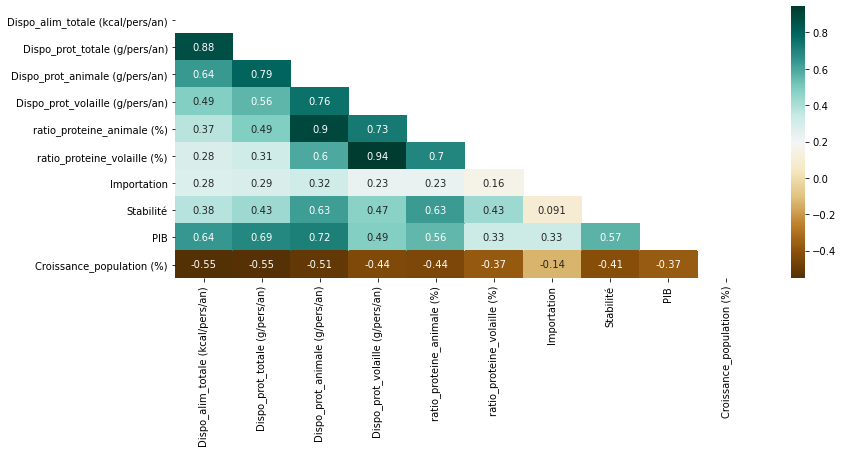

In [62]:
# Calculate pairwise-correlation
matrix = df_finale.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.show()

Fortes corrélations entre :

- la dispo. en protéines totale et la dispo. alimentaire
- la dispo. en protéines et le dispo. en protéines animale
- la dispo. en protéines et le PIB

In [63]:
df_finale = df_finale[['Pays', 'ratio_proteine_animale (%)','Importation', 'PIB', 'Croissance_population (%)', 'Stabilité']]
df_finale

,Pays,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité
0,Afghanistan,8.41,29.0,2058.4,2.41,-2.80
1,Afrique du Sud,34.90,514.0,12701.3,1.37,-0.28
2,Albanie,22.10,38.0,12771.0,-0.05,0.38
3,Algérie,11.34,2.0,11737.4,2.03,-0.92
4,Allemagne,33.95,842.0,52952.9,0.56,0.59
...,...,...,...,...,...,...
169,Émirats arabes unis,27.37,433.0,67183.6,1.52,0.62
170,Équateur,29.91,0.0,11617.9,1.78,-0.07
171,États-Unis d'Amérique,43.94,123.0,60109.7,0.62,0.34
172,Éthiopie,4.52,1.0,2021.6,2.65,-1.68


## Classification ascendante hierarchique

In [64]:
from scipy.stats import ks_2samp
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import decomposition, preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist

url_fig = 'C:/Users/p092279/Desktop/Documents/Data Analyst/P9'

In [65]:
df_CAH = df_finale.set_index('Pays')
df_CAH

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité
Pays,,,,,
Afghanistan,8.41,29.0,2058.4,2.41,-2.80
Afrique du Sud,34.90,514.0,12701.3,1.37,-0.28
Albanie,22.10,38.0,12771.0,-0.05,0.38
Algérie,11.34,2.0,11737.4,2.03,-0.92
Allemagne,33.95,842.0,52952.9,0.56,0.59
...,...,...,...,...,...
Émirats arabes unis,27.37,433.0,67183.6,1.52,0.62
Équateur,29.91,0.0,11617.9,1.78,-0.07
États-Unis d'Amérique,43.94,123.0,60109.7,0.62,0.34


In [66]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(df_CAH)
X_scaled = std_scale.transform(df_CAH)
names = df_CAH.index

In [67]:
# Les moyennes sont maintenant nulles (aux erreurs de troncature près) :
np.mean(X_scaled, axis=0)

array([-2.35751062e-16,  3.28954970e-17,  2.19303314e-17,  8.22387426e-17,
       -8.22387426e-18])

In [68]:
# Et les écarts-type unitaires.
np.std(X_scaled, axis = 0)

array([1., 1., 1., 1., 1.])

Text(0.5, 1.0, 'Visualisation après standardisation')

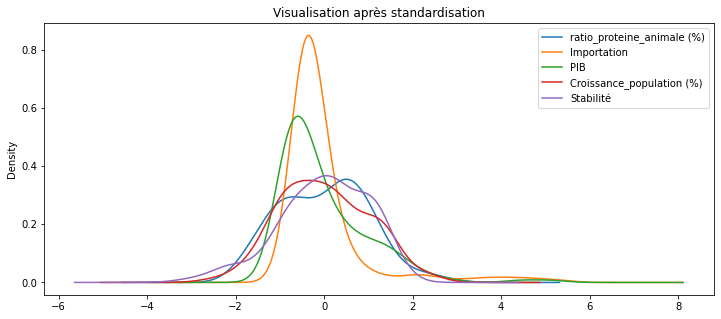

In [69]:
# Autre vérification : visualisation après standardisation (all variables have a mean of 0 and a standard deviation of 1)
pd.DataFrame(X_scaled, columns = df_CAH.columns).plot(kind='density', sharex=True, figsize=(12,5), layout=(10,1))
plt.title('Visualisation après standardisation')
# plt.savefig('fig1.jpeg')

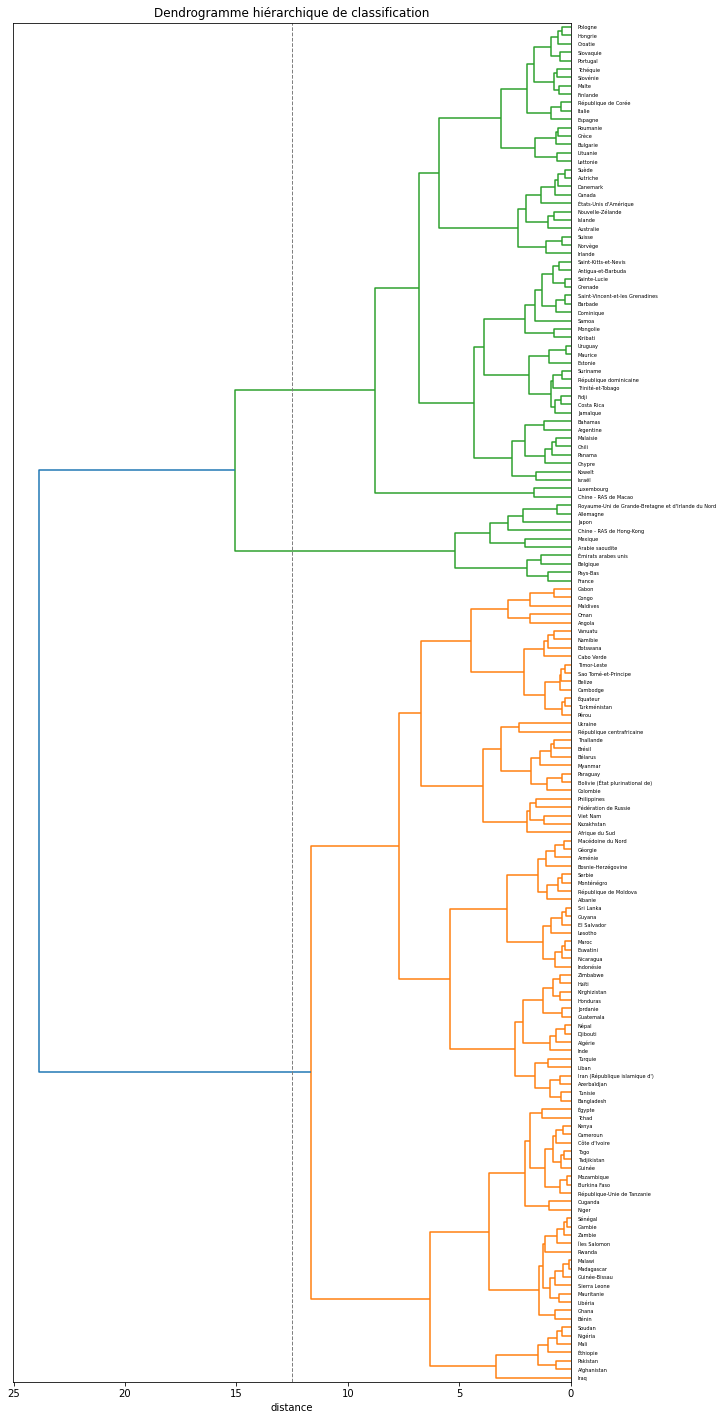

In [70]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plt.figure(figsize=(10,25))
dendrogram(Z,labels = names,orientation = "left")
plt.axvline(x=12.5, c='grey', lw=1, linestyle='dashed') # Threshold
plt.title('Dendrogramme hiérarchique de classification')
plt.xlabel('distance')
plt.show()

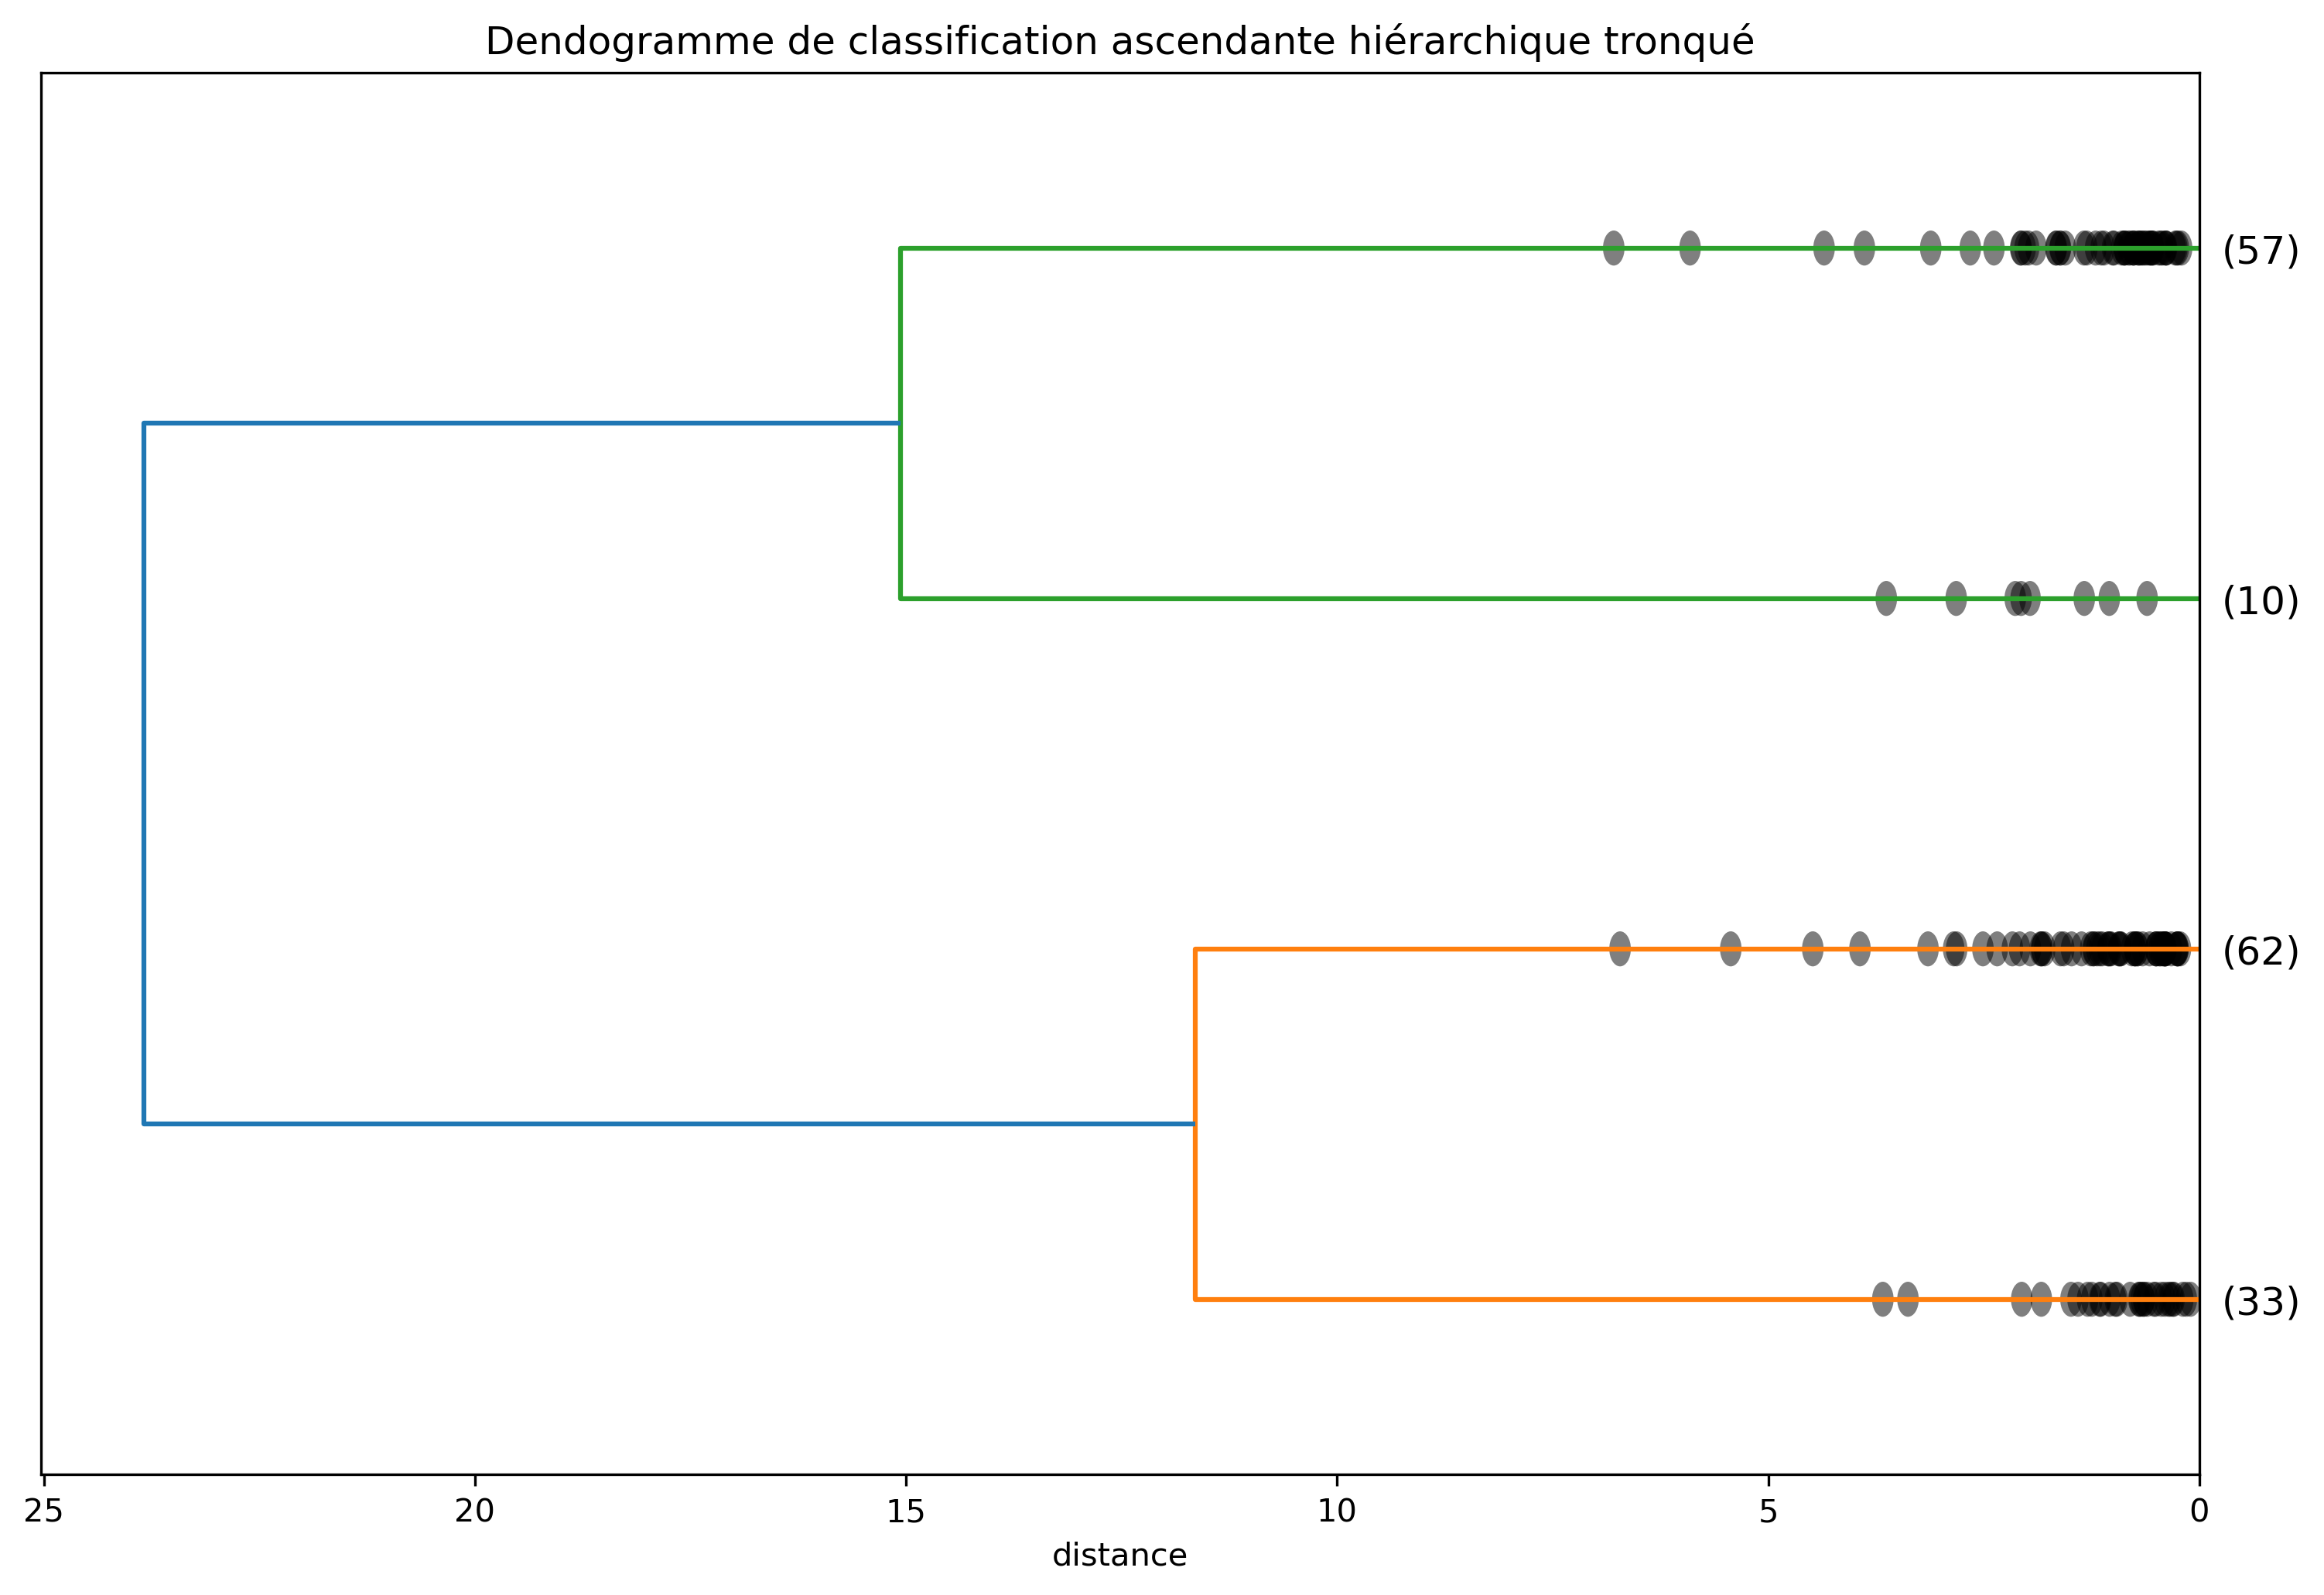

In [71]:
plt.figure(figsize=(12,8), dpi=300)
plt.title('Dendogramme de classification ascendante hiérarchique tronqué')
plt.xlabel('distance')
plt.grid(False)
dendrogram(
    Z,
    truncate_mode='lastp',
    p = 4,
    orientation = "left",
    show_contracted=True,
)
plt.show()

In [72]:
# Coupage du dendrogramme en 5 clusters
clusters = fcluster(Z, 4, criterion='maxclust')

In [73]:
# Exploration des différents cluters
for i in range(1,5):
    print(f"Group {i}:")
    print(", ".join(df_CAH.index[clusters == i].sort_values())) 
    print(" ")

Group 1:
Afghanistan, Burkina Faso, Bénin, Cameroun, Côte d'Ivoire, Gambie, Ghana, Guinée, Guinée-Bissau, Iraq, Kenya, Libéria, Madagascar, Malawi, Mali, Mauritanie, Mozambique, Niger, Nigéria, Ouganda, Pakistan, Rwanda, République-Unie de Tanzanie, Sierra Leone, Soudan, Sénégal, Tadjikistan, Tchad, Togo, Zambie, Égypte, Éthiopie, Îles Salomon
 
Group 2:
Afrique du Sud, Albanie, Algérie, Angola, Arménie, Azerbaïdjan, Bangladesh, Belize, Bolivie (État plurinational de), Bosnie-Herzégovine, Botswana, Brésil, Bélarus, Cabo Verde, Cambodge, Colombie, Congo, Djibouti, El Salvador, Eswatini, Fédération de Russie, Gabon, Guatemala, Guyana, Géorgie, Haïti, Honduras, Inde, Indonésie, Iran (République islamique d'), Jordanie, Kazakhstan, Kirghizistan, Lesotho, Liban, Macédoine du Nord, Maldives, Maroc, Monténégro, Myanmar, Namibie, Nicaragua, Népal, Oman, Paraguay, Philippines, Pérou, République centrafricaine, République de Moldova, Sao Tomé-et-Principe, Serbie, Sri Lanka, Thaïlande, Timor-Lest

In [74]:
# Ajout des clusters au df principal (je fais une copie X_c c-à-d X clustered)
df_CAH = df_CAH.copy()
df_CAH['cluster'] = clusters
df_CAH

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité,cluster
Pays,,,,,,
Afghanistan,8.41,29.0,2058.4,2.41,-2.80,1
Afrique du Sud,34.90,514.0,12701.3,1.37,-0.28,2
Albanie,22.10,38.0,12771.0,-0.05,0.38,2
Algérie,11.34,2.0,11737.4,2.03,-0.92,2
Allemagne,33.95,842.0,52952.9,0.56,0.59,3
...,...,...,...,...,...,...
Émirats arabes unis,27.37,433.0,67183.6,1.52,0.62,3
Équateur,29.91,0.0,11617.9,1.78,-0.07,2
États-Unis d'Amérique,43.94,123.0,60109.7,0.62,0.34,4


In [75]:
# Moyenne des variables non standardisées, par cluster
groupes_centroides = df_CAH.groupby(['cluster']).mean().reset_index()
groupes_centroides

,cluster,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité
0,1,15.133333,34.575758,3259.651515,2.700909,-0.887273
1,2,26.108548,49.274194,11002.917742,1.248710,-0.374032
2,3,36.412000,717.600000,48383.250000,0.731000,0.381000
3,4,38.320526,49.052632,35635.521053,0.551930,0.717193


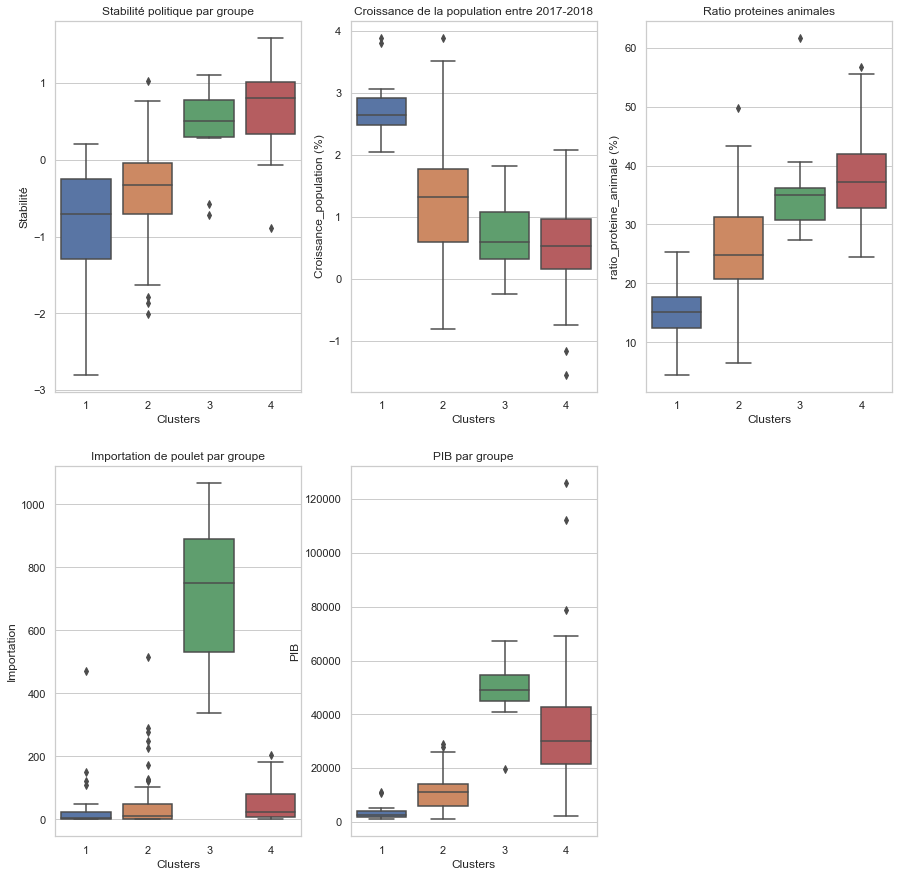

In [76]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

plt.subplot(231)
sns.boxplot(x="cluster", y="Stabilité", data=df_CAH)
plt.title('Stabilité politique par groupe')
plt.xlabel('Clusters')

plt.subplot(232)
sns.boxplot(x="cluster", y="Croissance_population (%)", data=df_CAH)
plt.title('Croissance de la population entre 2017-2018')
plt.xlabel('Clusters')

plt.subplot(233)
sns.boxplot(x="cluster", y="ratio_proteine_animale (%)", data=df_CAH)
plt.title('Ratio proteines animales')
plt.xlabel('Clusters')

plt.subplot(234)
sns.boxplot(x="cluster", y="Importation", data=df_CAH)
plt.title('Importation de poulet par groupe')
plt.xlabel('Clusters')

plt.subplot(235)
sns.boxplot(x="cluster", y="PIB", data=df_CAH)
plt.title('PIB par groupe')
plt.xlabel('Clusters')


plt.show(block=False)

#### Projection des centroides

In [77]:
groupes_centroides_CAH = groupes_centroides.set_index('cluster')
df_CAH

X = groupes_centroides_CAH.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Position des centroïdes
coor_centroides_CAH = pd.DataFrame(X_scaled, columns=groupes_centroides_CAH.columns, index=groupes_centroides_CAH.index)
coor_centroides_CAH

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité
cluster,,,,,
1,-1.497959,-0.610580,-1.169702,1.650511,-1.346858
2,-0.311804,-0.560175,-0.744689,-0.070425,-0.530241
3,0.801749,1.731690,1.307045,-0.683939,0.671091
4,1.008015,-0.560935,0.607347,-0.896147,1.206008


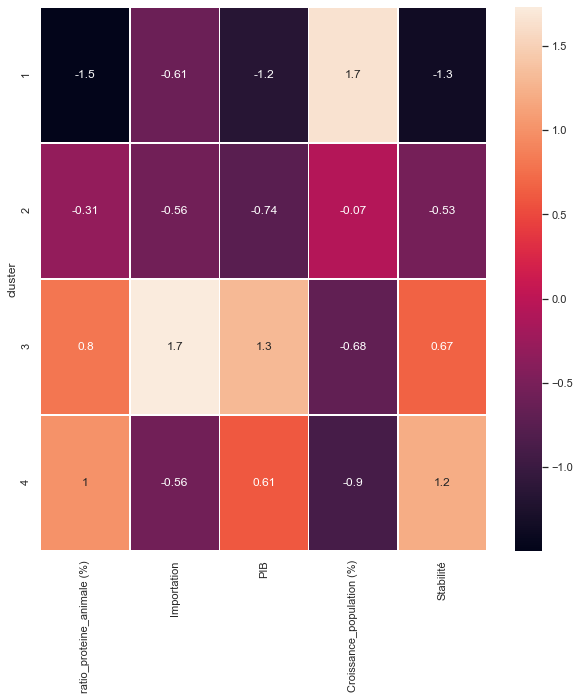

In [78]:
url_fig = 'C:/Users/p092279/Desktop/Documents/Data Analyst/P9/'

# Affichage du Headmap
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(coor_centroides_CAH, annot = True, linewidths = .5, ax = ax)
plt.savefig(url_fig + 'Headmap_CAH.png')

Ce que l'on constate (grandes lignes) :

- Cluster 1 et 2 : pays pauvres et/ou dans des situations géopolitiques complexes (croissance population élevée et stabilité faible), situation économiques difficiles.
- Cluster 3 et 4 : Ils ont à peu prés le meme profil sur la stabilité politique et la consommation de proteines d'origine animale, par contre le Clsuter 3 a la plus forte quantité d'exportation de poulet. On a porté notre choix sur les pays du cluster 3.

In [79]:
Choix_Pays = df_CAH[df_CAH['cluster']==3]
Choix_Pays

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité,cluster
Pays,,,,,,
Allemagne,33.95,842.0,52952.9,0.56,0.59,3
Arabie saoudite,28.63,722.0,47306.2,1.82,-0.58,3
Belgique,29.76,338.0,50442.3,0.55,0.43,3
Chine - RAS de Hong-Kong,61.68,907.0,59849.2,0.90,0.83,3
France,35.83,506.0,44577.1,0.23,0.28,3
Japon,40.65,1069.0,40966.6,-0.24,1.11,3
Mexique,34.98,972.0,19721.3,1.13,-0.72,3
Pays-Bas,34.93,608.0,55088.6,0.22,0.92,3
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,36.34,779.0,45744.7,0.62,0.33,3


In [80]:
Choix_Pays_CAH = Choix_Pays.sort_values(by = ['Stabilité'], ascending = True)
Choix_Pays_CAH

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité,cluster
Pays,,,,,,
Mexique,34.98,972.0,19721.3,1.13,-0.72,3
Arabie saoudite,28.63,722.0,47306.2,1.82,-0.58,3
France,35.83,506.0,44577.1,0.23,0.28,3
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,36.34,779.0,45744.7,0.62,0.33,3
Belgique,29.76,338.0,50442.3,0.55,0.43,3
Allemagne,33.95,842.0,52952.9,0.56,0.59,3
Émirats arabes unis,27.37,433.0,67183.6,1.52,0.62,3
Chine - RAS de Hong-Kong,61.68,907.0,59849.2,0.90,0.83,3
Pays-Bas,34.93,608.0,55088.6,0.22,0.92,3


## Kmeans

In [81]:
df_kmeans = df_finale.set_index('Pays')
df_kmeans.head()

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité
Pays,,,,,
Afghanistan,8.41,29.0,2058.4,2.41,-2.80
Afrique du Sud,34.90,514.0,12701.3,1.37,-0.28
Albanie,22.10,38.0,12771.0,-0.05,0.38
Algérie,11.34,2.0,11737.4,2.03,-0.92
Allemagne,33.95,842.0,52952.9,0.56,0.59


### Méthode du coude :
Pour visualiser le nombre de clusters optimum, nous allons utiliser la methode du ' Elbow ' :

C:\Users\p092279\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


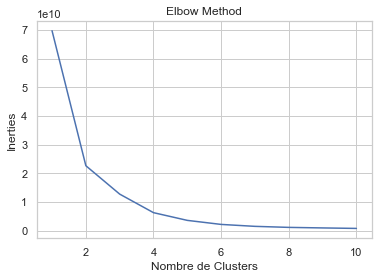

In [82]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
mapping1 = {}
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(df_kmeans)
    wcss.append(km.inertia_)
    mapping1[i] = km.inertia_
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inerties')
plt.show()

In [83]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 69753644356.86449
2 : 22632848392.59536
3 : 12730358994.471348
4 : 6252967540.258529
5 : 3560179592.9455686
6 : 2149258886.8224435
7 : 1474660925.1517484
8 : 1114338676.1102483
9 : 924693053.6148456
10 : 753739705.1172787


On définit 5 clusters avec la méthode du coude. On va pouvoir utiliser un algorithme du KMeans pour effectuer notre classification.

In [84]:
km = KMeans(n_clusters=5)
km.fit(df_kmeans)
clusters_km = km.labels_

In [85]:
df_kmeans['Clusterkm'] = clusters_km
df_kmeans

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité,Clusterkm
Pays,,,,,,
Afghanistan,8.41,29.0,2058.4,2.41,-2.80,3
Afrique du Sud,34.90,514.0,12701.3,1.37,-0.28,1
Albanie,22.10,38.0,12771.0,-0.05,0.38,1
Algérie,11.34,2.0,11737.4,2.03,-0.92,1
Allemagne,33.95,842.0,52952.9,0.56,0.59,0
...,...,...,...,...,...,...
Émirats arabes unis,27.37,433.0,67183.6,1.52,0.62,0
Équateur,29.91,0.0,11617.9,1.78,-0.07,1
États-Unis d'Amérique,43.94,123.0,60109.7,0.62,0.34,0


In [86]:
# Exploration des différents cluters
for i in range(0,5):
    print(f"Group {i}:")
    print(", ".join(df_kmeans.index[clusters_km == i].sort_values())) 
    print(" ")

Group 0:
Allemagne, Arabie saoudite, Australie, Autriche, Belgique, Canada, Chine - RAS de Hong-Kong, Danemark, Finlande, France, Irlande, Islande, Koweït, Norvège, Pays-Bas, Royaume-Uni de Grande-Bretagne et d'Irlande du Nord, Suisse, Suède, Émirats arabes unis, États-Unis d'Amérique
 
Group 1:
Afrique du Sud, Albanie, Algérie, Antigua-et-Barbuda, Arménie, Azerbaïdjan, Barbade, Bosnie-Herzégovine, Botswana, Brésil, Bulgarie, Bélarus, Colombie, Costa Rica, Dominique, Fidji, Gabon, Grenade, Guyana, Géorgie, Indonésie, Iran (République islamique d'), Iraq, Jamaïque, Jordanie, Liban, Macédoine du Nord, Maldives, Maurice, Mexique, Mongolie, Monténégro, Namibie, Paraguay, Pérou, République de Moldova, République dominicaine, Saint-Vincent-et-les Grenadines, Sainte-Lucie, Serbie, Sri Lanka, Suriname, Thaïlande, Tunisie, Turkménistan, Ukraine, Uruguay, Égypte, Équateur
 
Group 2:
Chine - RAS de Macao, Luxembourg
 
Group 3:
Afghanistan, Angola, Bangladesh, Belize, Bolivie (État plurinational d

In [87]:
# Moyenne des variables non standardisées, par cluster
groupes_centroides = df_kmeans.groupby(['Clusterkm']).mean().reset_index()
groupes_centroides

,Clusterkm,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité
0,0,36.612500,304.500000,55370.145000,0.848500,0.723000
1,1,30.323265,62.795918,14613.028571,0.891020,-0.088367
2,2,47.375000,17.000000,119246.000000,1.765000,1.380000
3,3,20.070333,30.883333,4003.823333,2.132500,-0.572667
4,4,37.079355,100.451613,32343.351613,0.426129,0.441613


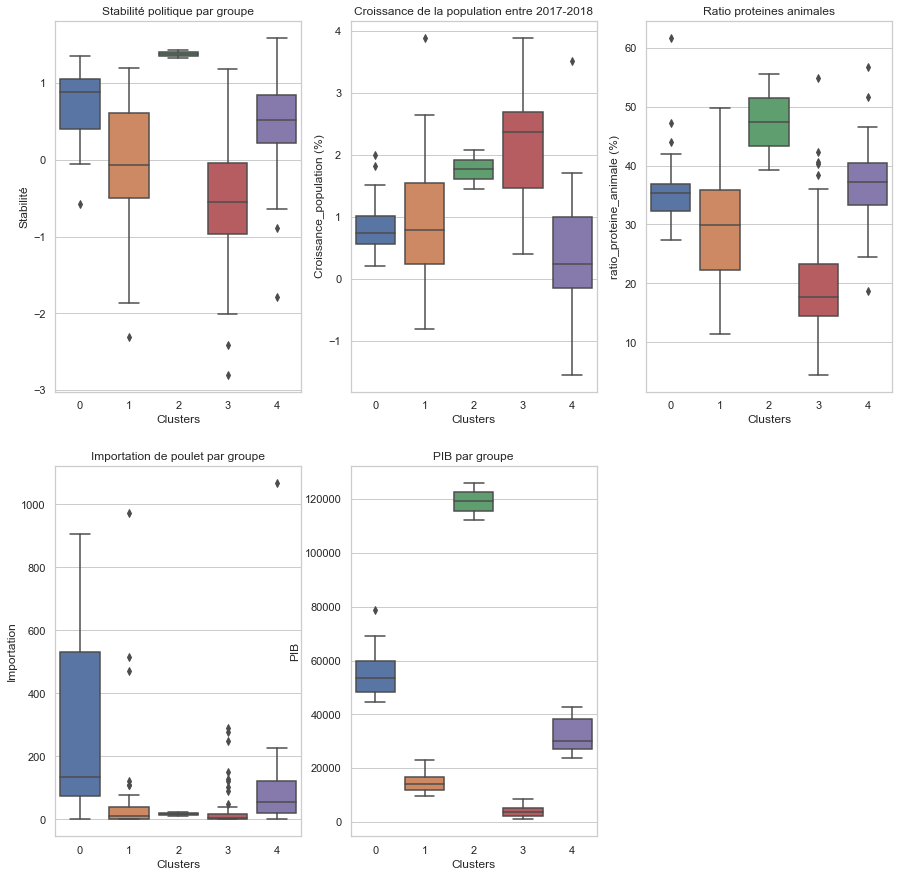

In [88]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

plt.subplot(231)
sns.boxplot(x="Clusterkm", y="Stabilité", data=df_kmeans)
plt.title('Stabilité politique par groupe')
plt.xlabel('Clusters')

plt.subplot(232)
sns.boxplot(x="Clusterkm", y="Croissance_population (%)", data=df_kmeans)
plt.title('Croissance de la population entre 2017-2018')
plt.xlabel('Clusters')

plt.subplot(233)
sns.boxplot(x="Clusterkm", y="ratio_proteine_animale (%)", data=df_kmeans)
plt.title('Ratio proteines animales')
plt.xlabel('Clusters')

plt.subplot(234)
sns.boxplot(x="Clusterkm", y="Importation", data=df_kmeans)
plt.title('Importation de poulet par groupe')
plt.xlabel('Clusters')

plt.subplot(235)
sns.boxplot(x="Clusterkm", y="PIB", data=df_kmeans)
plt.title('PIB par groupe')
plt.xlabel('Clusters')

plt.show(block=False)

In [89]:
groupes_centroides_kmeans = groupes_centroides.set_index('Clusterkm')

X = groupes_centroides_kmeans.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Position des centroïdes
coor_centroides_kmeans = pd.DataFrame(X_scaled, columns=groupes_centroides_kmeans.columns, index=groupes_centroides_kmeans.index)
coor_centroides_kmeans

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité
Clusterkm,,,,,
0,0.258679,1.923141,0.250429,-0.574895,0.516401
1,-0.442444,-0.385158,-0.744880,-0.507763,-0.693562
2,1.458480,-0.822514,1.810309,0.872093,1.496162
3,-1.585439,-0.689927,-1.003962,1.452309,-1.415780
4,0.310724,-0.025542,-0.311897,-1.241743,0.096779


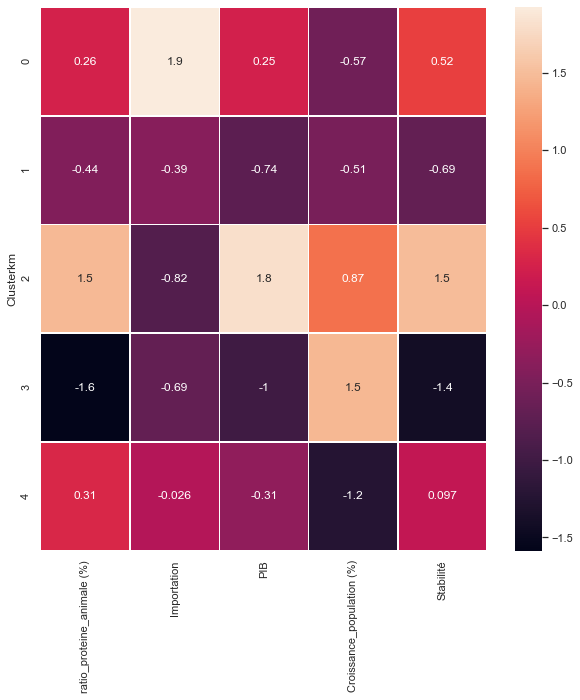

In [90]:
# Affichage du Headmap
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(coor_centroides_kmeans, annot = True, linewidths = .5, ax = ax)
plt.savefig(url_fig + 'Headmap_kmeans.png')

Ce que l'on constate (grandes lignes) :

- Cluster 1 et 3 : pays pauvres et/ou dans des situations géopolitiques complexes (croissance population élevée et stabilité faible), situation économiques difficiles.
- Cluster 2 : Pays riches mais qui importent trés peu de la volaille. On y retrouve le Luxembourg, la Chine
- Cluster 0 et 4 : Ils ont à peu prés le meme profil sur la stabilité politique et la consommation de proteines d'origine animale, par contre le Cluster 0 a la plus forte quantité d'exportation de poulet. On a porté notre choix sur les pays du cluster 0.

In [110]:
Choix_Pays_kmeans = df_kmeans[df_kmeans['Clusterkm']==0]
Choix_Pays_kmeans

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité,Clusterkm
Pays,,,,,,
Allemagne,33.95,842.0,52952.9,0.56,0.59,0
Arabie saoudite,28.63,722.0,47306.2,1.82,-0.58,0
Australie,47.22,16.0,48482.6,1.28,0.89,0
Autriche,35.26,110.0,54170.0,0.81,1.05,0
Belgique,29.76,338.0,50442.3,0.55,0.43,0
Canada,36.52,182.0,48317.1,0.93,1.10,0
Chine - RAS de Hong-Kong,61.68,907.0,59849.2,0.90,0.83,0
Danemark,38.08,133.0,55356.7,0.35,0.87,0
Finlande,32.10,16.0,47570.1,0.20,1.08,0


In [92]:
Choix_Pays_kmeans = Choix_Pays_kmeans.sort_values(by = ['Stabilité'], ascending = True)
Choix_Pays_kmeans

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité,Clusterkm
Pays,,,,,,
Arabie saoudite,28.63,722.0,47306.2,1.82,-0.58,0
Koweït,33.22,137.0,50855.6,2.00,-0.05,0
France,35.83,506.0,44577.1,0.23,0.28,0
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,36.34,779.0,45744.7,0.62,0.33,0
États-Unis d'Amérique,43.94,123.0,60109.7,0.62,0.34,0
Belgique,29.76,338.0,50442.3,0.55,0.43,0
Allemagne,33.95,842.0,52952.9,0.56,0.59,0
Émirats arabes unis,27.37,433.0,67183.6,1.52,0.62,0
Chine - RAS de Hong-Kong,61.68,907.0,59849.2,0.90,0.83,0


## Analyse en composante principale (ACP) 

L'ACP a deux objectifs principaux. Elle permet d'étudier :

- La variabilité entre les individus, c'est-à-dire quelles sont les différences et les ressemblances entre individus.
- Les liaisons entre les variables : y a-t-il des groupes de variables très corrélées entre elles qui peuvent être regroupées en de nouvelles variables synthétiques ?

In [93]:
df_ACP = df_finale.set_index('Pays')
df_ACP

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité
Pays,,,,,
Afghanistan,8.41,29.0,2058.4,2.41,-2.80
Afrique du Sud,34.90,514.0,12701.3,1.37,-0.28
Albanie,22.10,38.0,12771.0,-0.05,0.38
Algérie,11.34,2.0,11737.4,2.03,-0.92
Allemagne,33.95,842.0,52952.9,0.56,0.59
...,...,...,...,...,...
Émirats arabes unis,27.37,433.0,67183.6,1.52,0.62
Équateur,29.91,0.0,11617.9,1.78,-0.07
États-Unis d'Amérique,43.94,123.0,60109.7,0.62,0.34


Une fois la liste de pays créée, on peut passer à l'analyse en composantes principales. Grâce à cette dernière, on pourra définir des composantes dans laquelle nos pays évoluent et ensuite créer un nuage de points contenant le placement de nos pays en fonction des composantes créées plus tôt.

### Eboulis des valeurs propres

In [94]:
# Choix du nombre de composantes à calculer 
n_comp = len(df_ACP.columns)

In [95]:
# On prépare les données en faisant une normalisation (centrage-réduction)

X = df_ACP.values
names = df_ACP.index
features = df_ACP.columns

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [96]:
# Les moyennes sont maintenant nulles (aux erreurs de troncature près) :
np.mean(X_scaled, axis=0)

array([-2.35751062e-16,  3.28954970e-17,  2.19303314e-17,  8.22387426e-17,
       -8.22387426e-18])

In [97]:
# Et les écarts-type unitaires.
np.std(X_scaled, axis = 0)

array([1., 1., 1., 1., 1.])

In [98]:
# On applique l'ACP sur nos données transformées
pca = decomposition.PCA(n_components = n_comp)
pca.fit(X_scaled)

PCA(n_components=5)

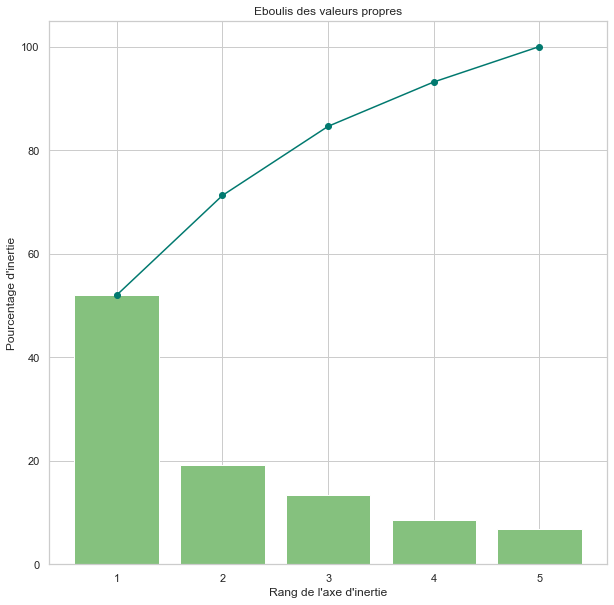

In [99]:
# On affiche l'éboulis des valeurs propres
# On pourra voir le pourcentage d'inertie pour chaque composante

fig, ax = plt.subplots(figsize=(10,10))
Variance = pca.explained_variance_ratio_*100
Valeur_propre = pca.explained_variance_
plt.bar(np.arange(len(Variance))+1, Variance, color='#85C17E')
plt.plot(np.arange(len(Variance))+1, Variance.cumsum(),marker='o', color='#01796F')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")

plt.show(block=False)

In [100]:
for i in range(0,5):
    print(f"F{i+1}:")
    print("Valeur Propre =", round(Valeur_propre[i],2))
    print("Variance =", round(Variance[i],2), '\n') 

F1:
Valeur Propre = 2.62
Variance = 52.0 

F2:
Valeur Propre = 0.97
Variance = 19.24 

F3:
Valeur Propre = 0.67
Variance = 13.36 

F4:
Valeur Propre = 0.43
Variance = 8.57 

F5:
Valeur Propre = 0.34
Variance = 6.84 



La règle de Kaiser repose sur une idée simple. Dans une ACP normée, la somme des valeurs propres étant égale au nombre de variables, leur moyenne vaut 1. Nous considérons par conséquent qu’un axe est intéressant si sa valeur propre est supérieure 1.

Le critère du Kaiser nous conduit à retenir les 2 premiers axes (F1, F2). En effet ils restituent 71.2% de l’information (l’inertie) disponible.

### Cercle de corrélation 

In [101]:
#circles of correlations
pcs = pca.components_


In [102]:
#projection
X_projected = pca.transform(X_scaled)

In [103]:
#figure initialization
plt.figure(figsize=(20,30))

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

In [104]:
# Préparation de l'environnement

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                      plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
            plt.plot(np.cos(an), np.sin(an))
            plt.axis('equal')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

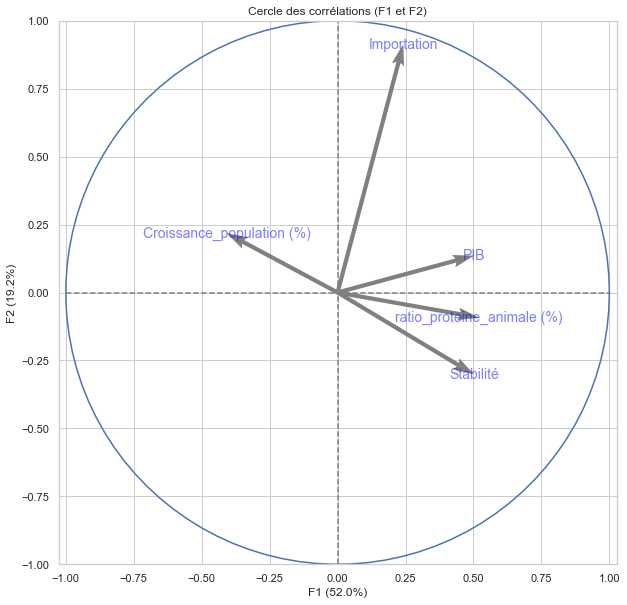

In [105]:
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

Projection des variables du F1 :
- Stabilité : 0,5 
- Ratio Proteines animale : 0,5 
- PIB = 0,5 
- Croissance population : -0,4 
- Importation : 0,25 

Projection des variables sur F2
- Stabilité : -0,3
- Ratio Proteines animale : -0,1
- PIB = 0,125
- Croissance population : 0,2
- Importation : 0,9

les projections nous montrent que la stabilité, le PIB et le ratio en proteines animales sont corrélées positivement à F1, la croissance de la population est corrélée negativement à F1. On peut dire que F1 regroupe les critéres sociaux, economiques et politiques pour mesurer le developpement d'un pays.Si ce sont des pays riches ou pauvres.

l'Importation est fortement corrélée à F2 et trés peu à F1. en effet, F2 englobe que les informations sur l'importation de volaille.

### Projection des individus sur F1 et F2 

In [106]:
df_ACP['Clusterkm'] = clusters_km
df_ACP

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité,Clusterkm
Pays,,,,,,
Afghanistan,8.41,29.0,2058.4,2.41,-2.80,3
Afrique du Sud,34.90,514.0,12701.3,1.37,-0.28,1
Albanie,22.10,38.0,12771.0,-0.05,0.38,1
Algérie,11.34,2.0,11737.4,2.03,-0.92,1
Allemagne,33.95,842.0,52952.9,0.56,0.59,0
...,...,...,...,...,...,...
Émirats arabes unis,27.37,433.0,67183.6,1.52,0.62,0
Équateur,29.91,0.0,11617.9,1.78,-0.07,1
États-Unis d'Amérique,43.94,123.0,60109.7,0.62,0.34,0


In [107]:
illustrative_var = df_ACP['Clusterkm']

In [108]:
# Préparation de l'environnement
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(10,10))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

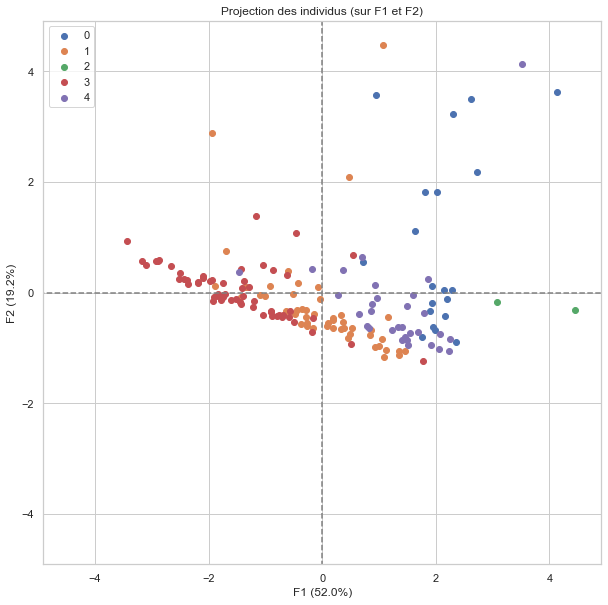

In [109]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=illustrative_var)

- Les pays du groupe 1 et 3 ont presque les memes profils (croissance de la popuation élevée, stabilité politique faible, et PIB faible) ==> Ce sont des pays pauvres avec des situation géopolitique complexes.

- les 2 pays du groupe 2 sortent du lot avec un PIB trés élevé et une trés bonne stabilité politique, par contre ils importent trés peu de volaille.

- le Groupe 0 et 4 ont le meme profil mais le groupe 0 importe plus de la viande de volaille.

In [111]:
# Moyenne des variables non standardisées, par cluster
groupes_centroides = df_ACP.groupby(['Clusterkm']).mean().reset_index()
groupes_centroides

,Clusterkm,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité
0,0,36.612500,304.500000,55370.145000,0.848500,0.723000
1,1,30.323265,62.795918,14613.028571,0.891020,-0.088367
2,2,47.375000,17.000000,119246.000000,1.765000,1.380000
3,3,20.070333,30.883333,4003.823333,2.132500,-0.572667
4,4,37.079355,100.451613,32343.351613,0.426129,0.441613


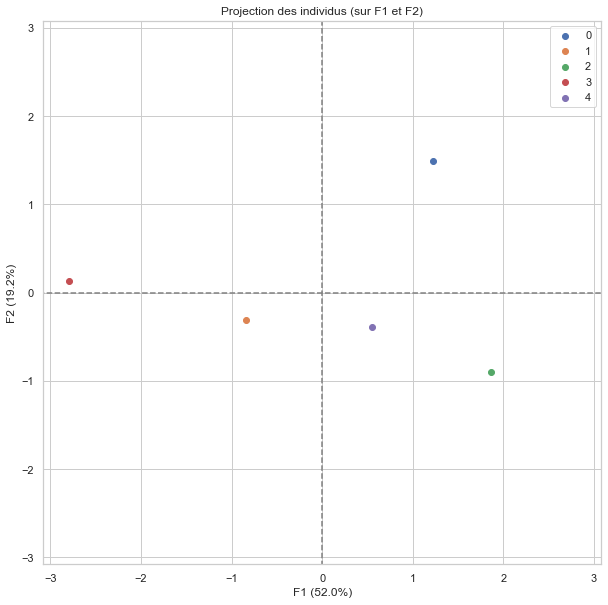

In [112]:
#groupes_centroides = groupes_centroides.drop(columns='Clusterkm')
groupes_centroides_ACP = groupes_centroides.set_index('Clusterkm')


X = groupes_centroides_ACP.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Projection des points dans le premier plan factoriel
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=groupes_centroides_ACP.index)

In [113]:
# Position des centroïdes
coor_centroides_ACP = pd.DataFrame(X_scaled, columns=groupes_centroides_ACP.columns, index=groupes_centroides_ACP.index)
coor_centroides_ACP

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité
Clusterkm,,,,,
0,0.258679,1.923141,0.250429,-0.574895,0.516401
1,-0.442444,-0.385158,-0.744880,-0.507763,-0.693562
2,1.458480,-0.822514,1.810309,0.872093,1.496162
3,-1.585439,-0.689927,-1.003962,1.452309,-1.415780
4,0.310724,-0.025542,-0.311897,-1.241743,0.096779


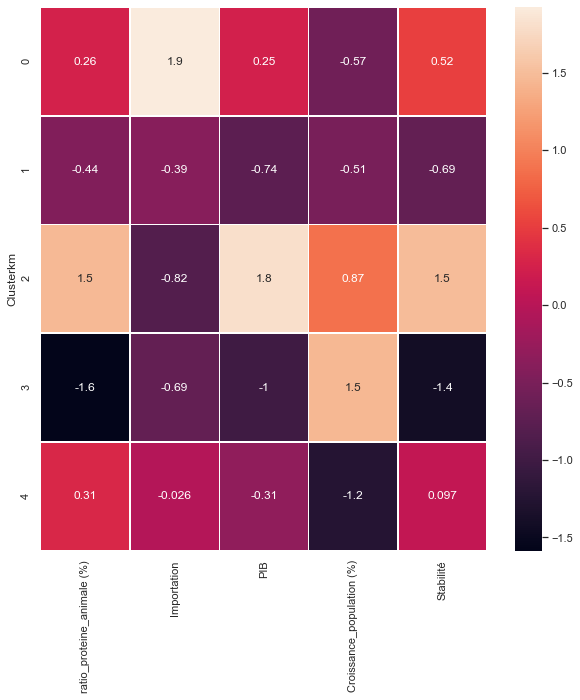

In [114]:
# Affichage du Headmap
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(coor_centroides_ACP, annot = True, linewidths = .5, ax = ax)
plt.savefig(url_fig + 'Headmap_ACP.png')

In [116]:
Choix_Pays_ACP = df_ACP[df_kmeans['Clusterkm']==0]
Choix_Pays_ACP

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité,Clusterkm
Pays,,,,,,
Allemagne,33.95,842.0,52952.9,0.56,0.59,0
Arabie saoudite,28.63,722.0,47306.2,1.82,-0.58,0
Australie,47.22,16.0,48482.6,1.28,0.89,0
Autriche,35.26,110.0,54170.0,0.81,1.05,0
Belgique,29.76,338.0,50442.3,0.55,0.43,0
Canada,36.52,182.0,48317.1,0.93,1.10,0
Chine - RAS de Hong-Kong,61.68,907.0,59849.2,0.90,0.83,0
Danemark,38.08,133.0,55356.7,0.35,0.87,0
Finlande,32.10,16.0,47570.1,0.20,1.08,0


In [117]:
# Classsement par Stabilité politique
Choix_Pays_15 = Choix_Pays_ACP.sort_values(by = ['Stabilité'], ascending = False)
# Selection des 15 premiers pays
Choix_Pays_15 = Choix_Pays_15.iloc[0:15]
Choix_Pays_15

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité,Clusterkm
Pays,,,,,,
Islande,42.01,2.0,55638.5,0.69,1.35,0
Suisse,31.47,51.0,69103.6,0.83,1.26,0
Norvège,32.32,2.0,64050.8,0.79,1.17,0
Canada,36.52,182.0,48317.1,0.93,1.10,0
Finlande,32.10,16.0,47570.1,0.20,1.08,0
Autriche,35.26,110.0,54170.0,0.81,1.05,0
Irlande,35.47,99.0,78655.6,1.38,1.00,0
Suède,36.15,84.0,51948.0,0.67,0.98,0
Pays-Bas,34.93,608.0,55088.6,0.22,0.92,0


In [118]:
# Classsement par quantité de volaille importée
Choix_Pays_10 = Choix_Pays_15.sort_values(by = ['Importation'], ascending = False)
# Selection des 10 premiers pays
Choix_Pays_10 = Choix_Pays_10.iloc[0:10]
Choix_Pays_10

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité,Clusterkm
Pays,,,,,,
Chine - RAS de Hong-Kong,61.68,907.0,59849.2,0.90,0.83,0
Allemagne,33.95,842.0,52952.9,0.56,0.59,0
Pays-Bas,34.93,608.0,55088.6,0.22,0.92,0
Émirats arabes unis,27.37,433.0,67183.6,1.52,0.62,0
Belgique,29.76,338.0,50442.3,0.55,0.43,0
Canada,36.52,182.0,48317.1,0.93,1.10,0
Danemark,38.08,133.0,55356.7,0.35,0.87,0
Autriche,35.26,110.0,54170.0,0.81,1.05,0
Irlande,35.47,99.0,78655.6,1.38,1.00,0


In [119]:
# Classsement par ratio proteiné 
Choix_Pays_5 = Choix_Pays_10.sort_values(by = ['ratio_proteine_animale (%)'], ascending = False)
# Selection des 5 premiers pays
Choix_Pays = Choix_Pays_5.iloc[0:5]
Choix_Pays

,ratio_proteine_animale (%),Importation,PIB,Croissance_population (%),Stabilité,Clusterkm
Pays,,,,,,
Chine - RAS de Hong-Kong,61.68,907.0,59849.2,0.90,0.83,0
Danemark,38.08,133.0,55356.7,0.35,0.87,0
Canada,36.52,182.0,48317.1,0.93,1.10,0
Suède,36.15,84.0,51948.0,0.67,0.98,0
Irlande,35.47,99.0,78655.6,1.38,1.00,0
